# CS375 - Assignment 1
#### Group 6 

## Part 1: ImageNet training and testing

In [1]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

### Getting data from the database
Let's connect to the database and pull the data training and test data that is stored while training our network.
In order to find the right experiment id, it is useful to display which experiments are stored in the database first.

In [4]:
collname = 'tinynet'
v_list = ['V0V3V6', 'V6']
target_layers = ['conv1', 'pool1', 'conv2', 'pool2', 'fc6', 'fc7', 'fc8']
step_list = [30000]

In [5]:
coll = p_get_coll(collname)
coll.distinct('exp_id')

[u'experiment_1',
 u'experiment_1_30000_tinynet_V0V3V6',
 u'experiment_1_30000_tinynet_V6']

### Plotting the training curve
To see the training curve for the experiment, we pull the training loss and plot it, along with a smoothed version of the training loss obtained by convolving the loss with a boxcar.
Smoothed plot of training loss. Please note that the bump at around iteration 80,000 is due to having to recover the model and resume training after a gcloud crash.

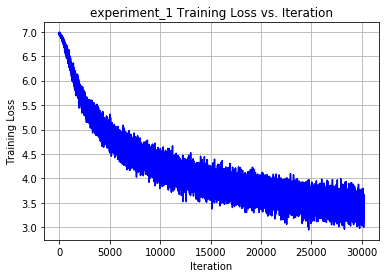

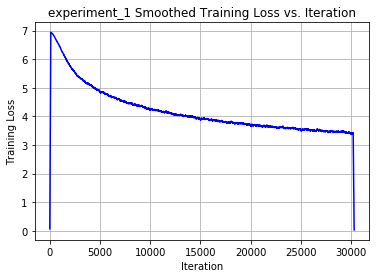

In [16]:
texp_id = 'experiment_1'
p22_training(texp_id,coll)

### Plotting the validation results
After our train_imagenet function has evaluated the Image Net validation set for the time we can have a look at the validation results of for example exp_id='experiment_1'. Again, you need to pull the validation data from the database first. The validation data consists of the top1 and top5 accuracy that you have implemented previously. 

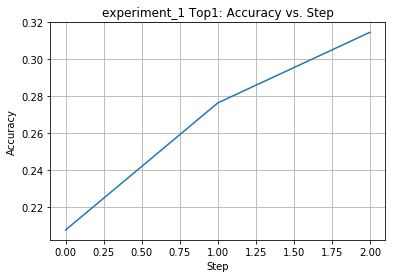

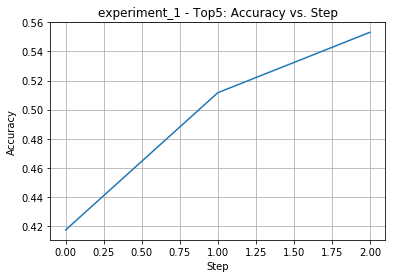

In [17]:
p22_topo(texp_id, coll)

## Neural analysis


In the following, your task will be to plot your evaluations at different iteration steps. Therefore, index the data list with the appropriate indices, plot the results and mark all of the following plots with the iteration step.

In [18]:
data = {}
for iv in v_list:
    for istep in step_list:
        data[(iv, istep)] = p_get_data_list(coll, collname, istep, iv)

30000 V0V3V6
30000 V6


In [19]:
# data[('V0V3V6', 30000)].keys()

### Analyzing the RDM results

We will start with visualizing the RDMs you computed for each layer and the IT neurons. 

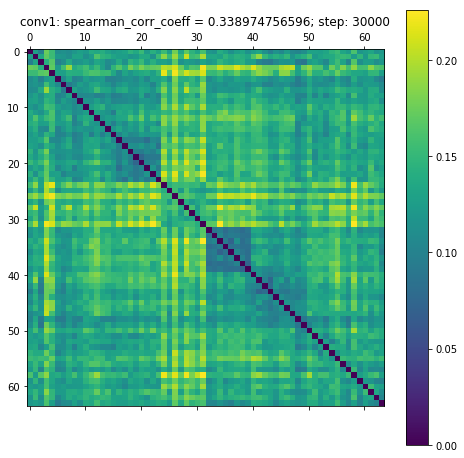

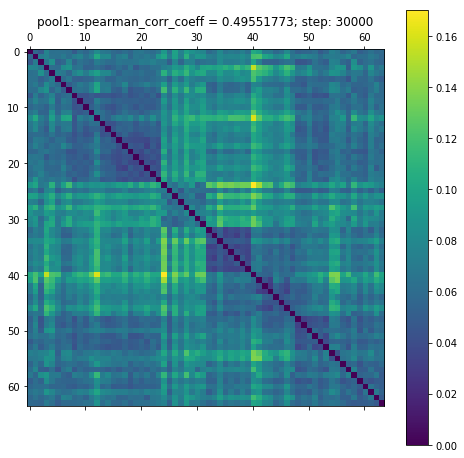

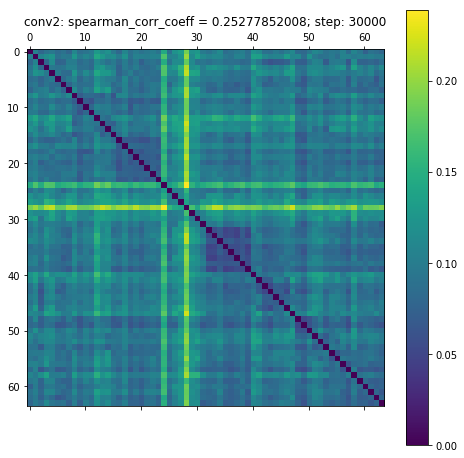

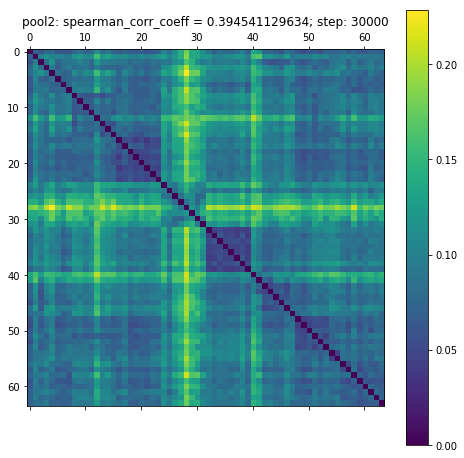

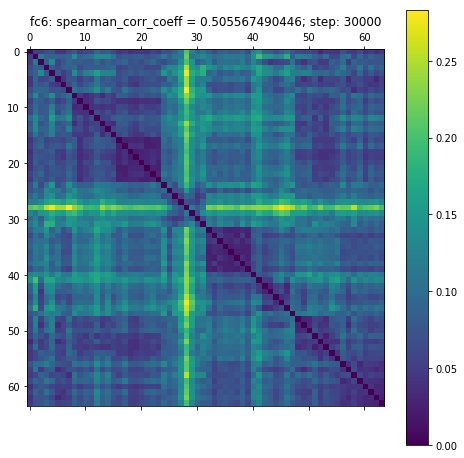

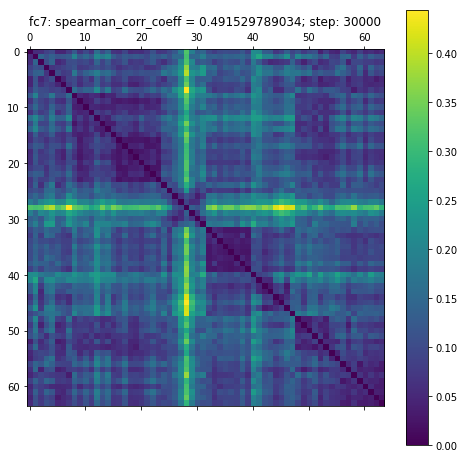

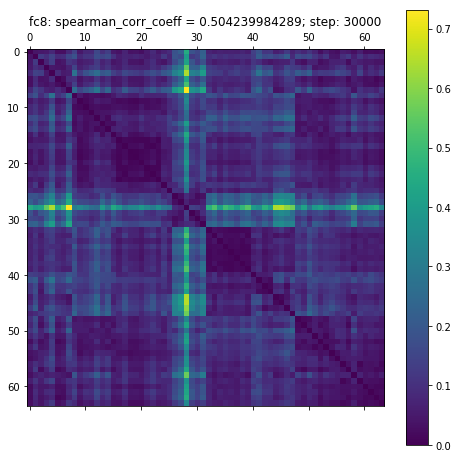

In [20]:
for istep in step_list:
    plot_rdms(data[('V6',istep)], target_layers, istep)

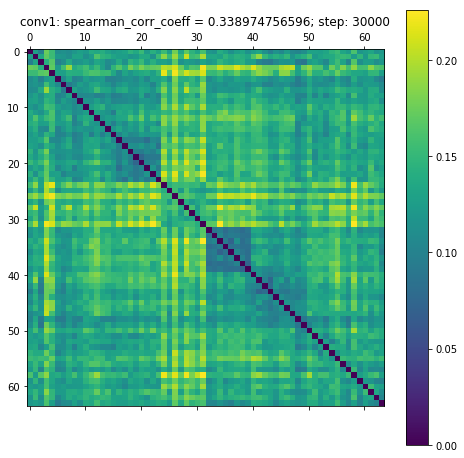

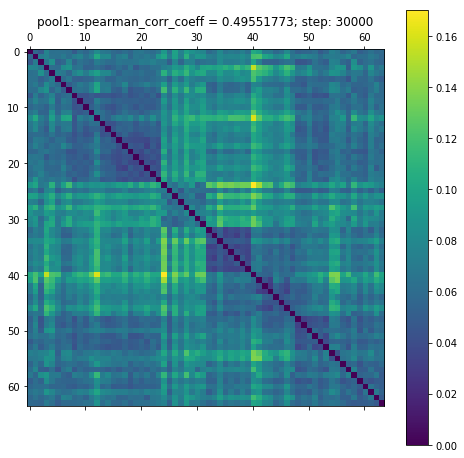

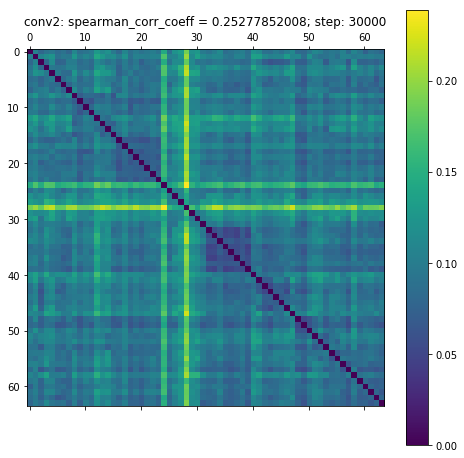

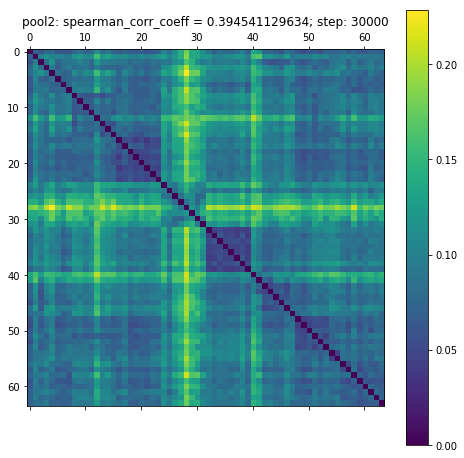

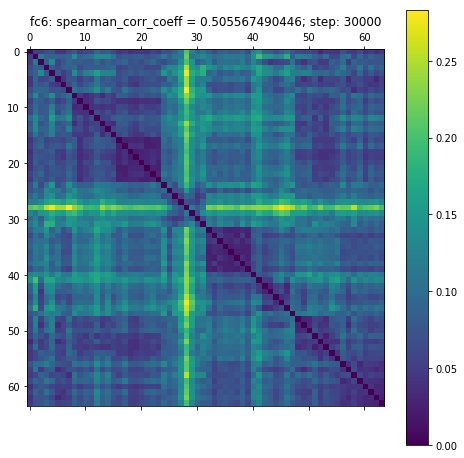

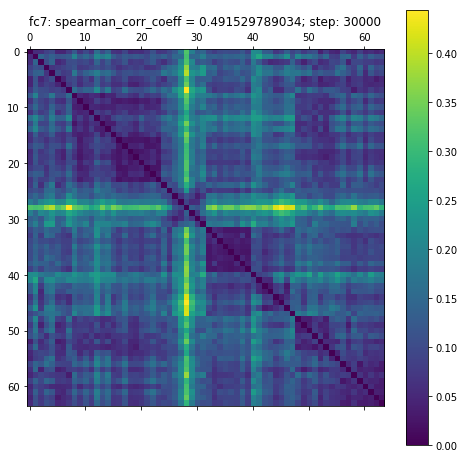

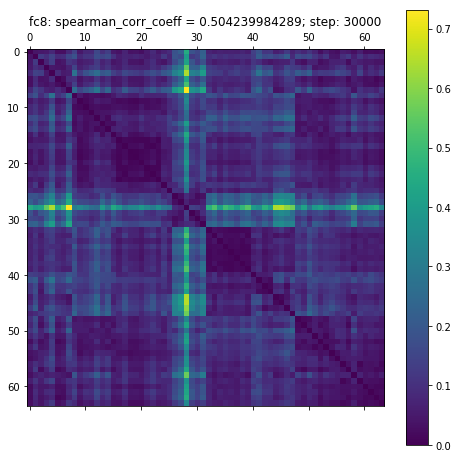

In [21]:
for istep in step_list:
    plot_rdms(data[('V0V3V6',istep)], target_layers, istep)

### Analyzing the categorization results

Now let's visualize the results of the categorization and within categorization test we performed for each layer. 

The inclusion of V0 and V3 data improves the mean accuracy.

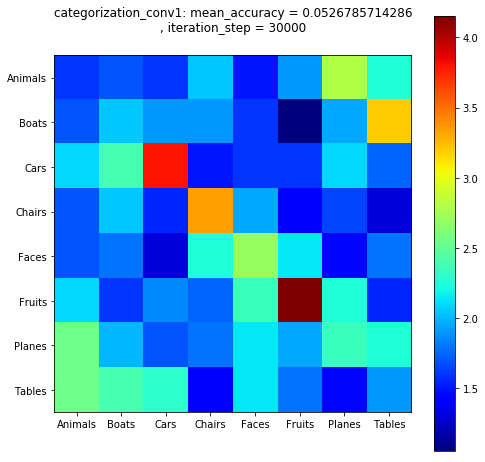

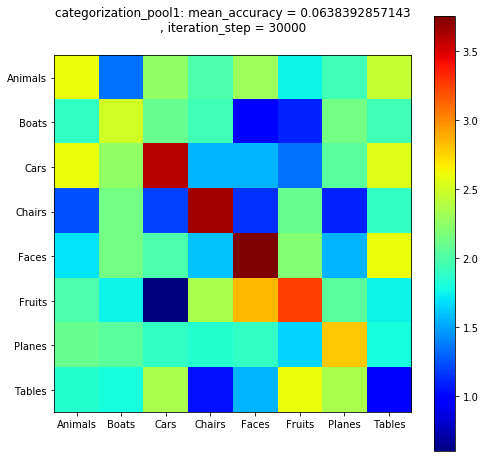

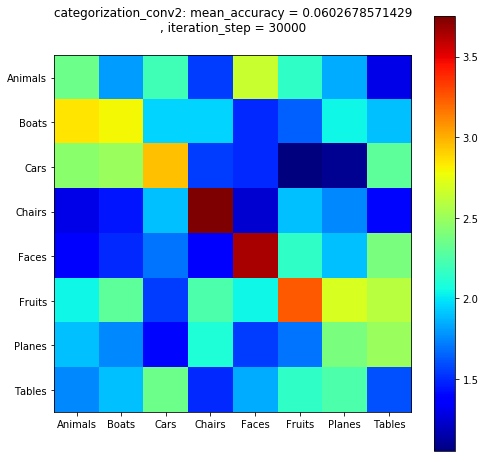

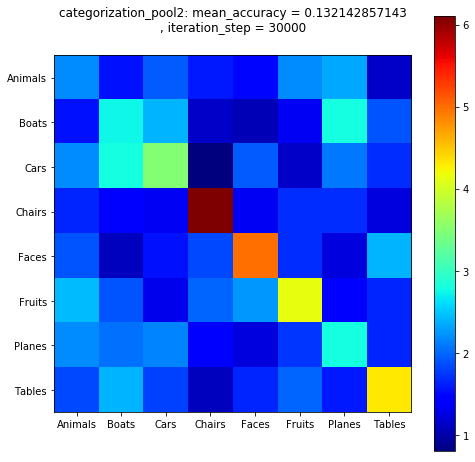

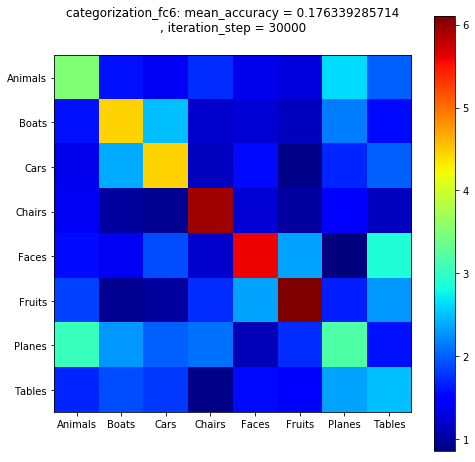

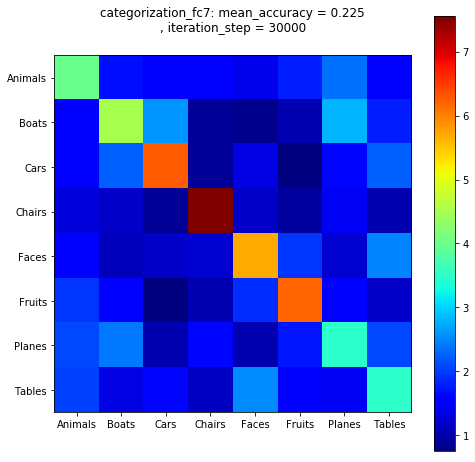

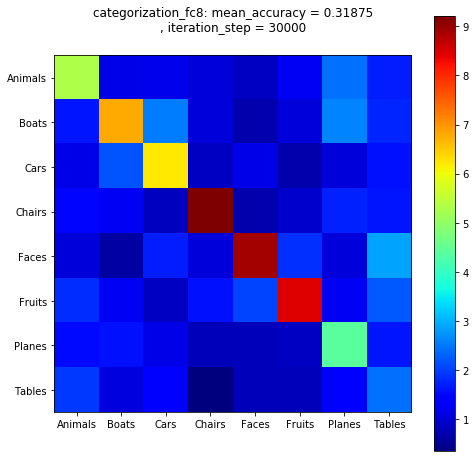

In [32]:
for istep in step_list:
    plot_categorization_results(data[('V6',istep)], target_layers, istep)

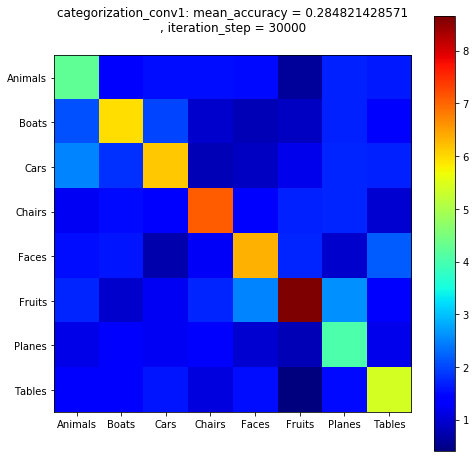

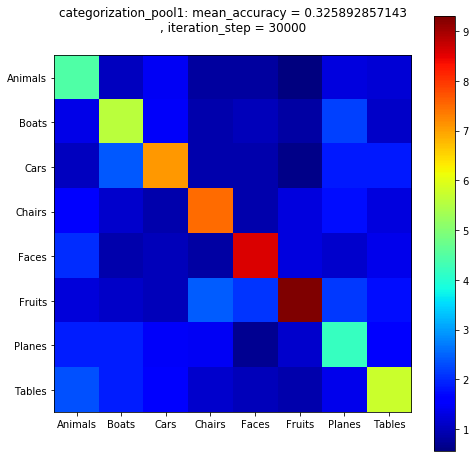

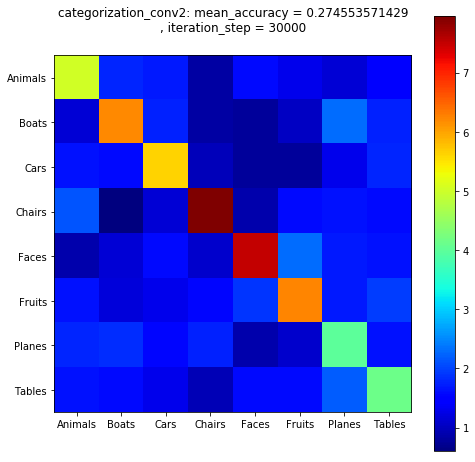

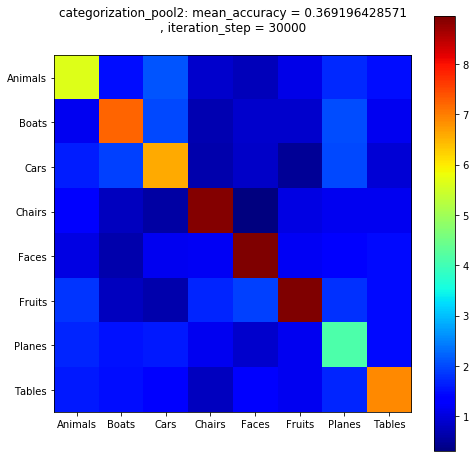

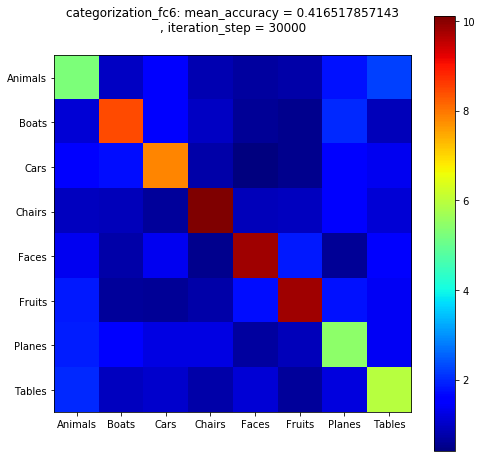

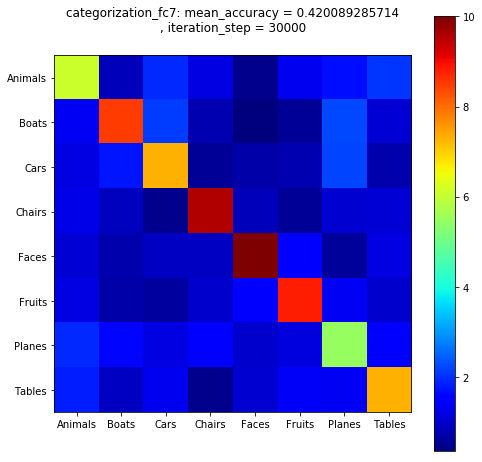

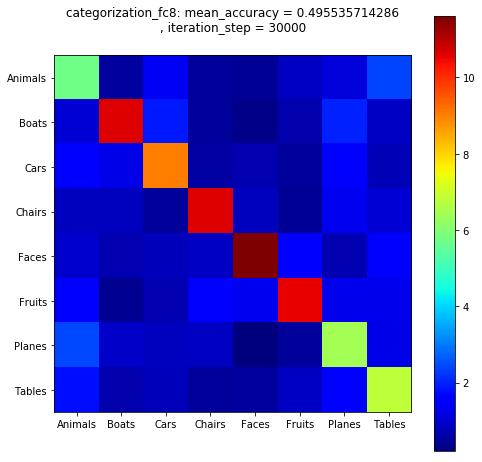

In [33]:
for istep in step_list:
    plot_categorization_results(data[('V0V3V6',istep)], target_layers, istep)

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


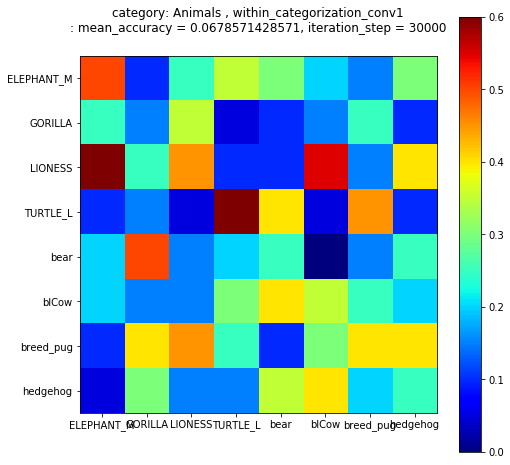

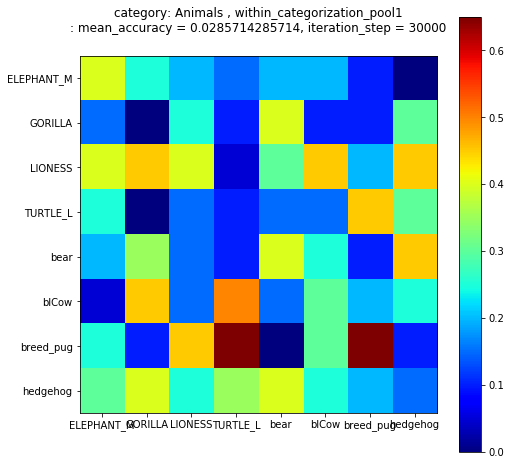

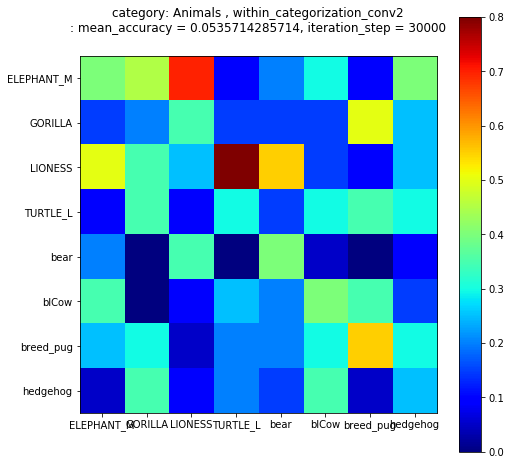

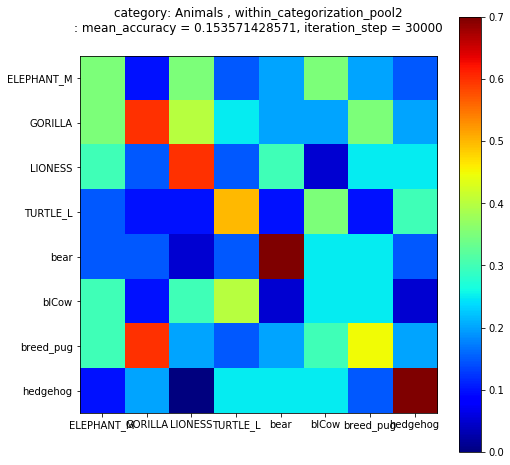

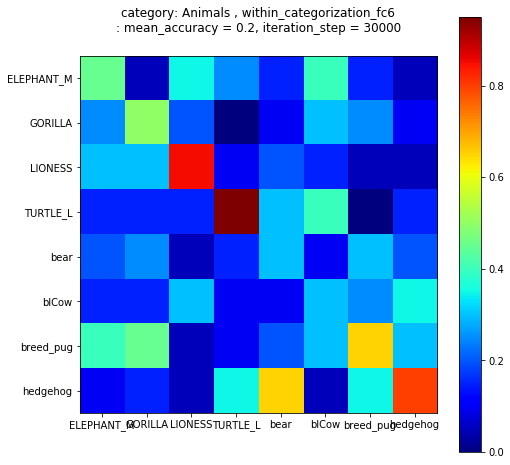

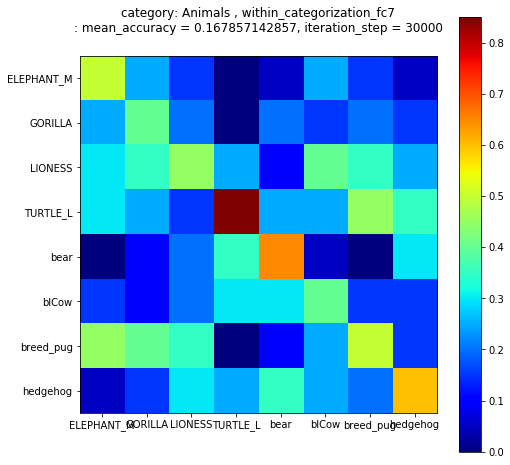

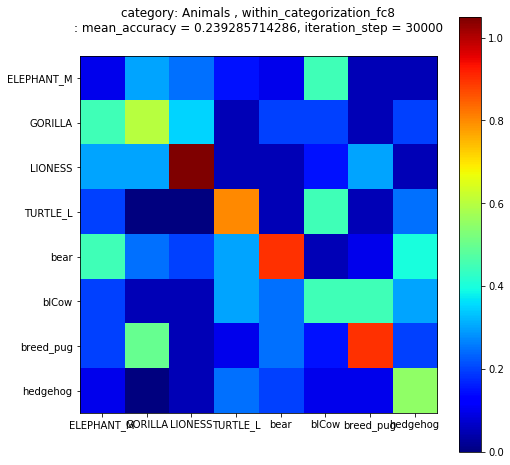

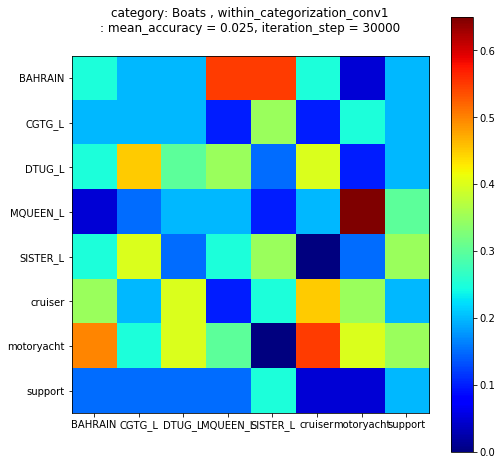

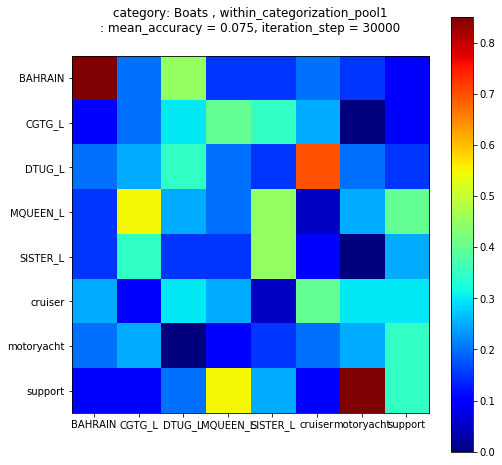

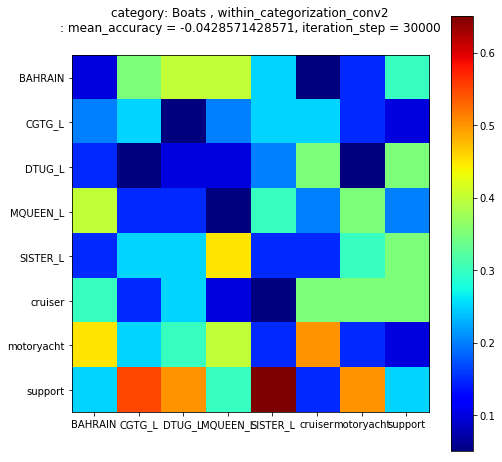

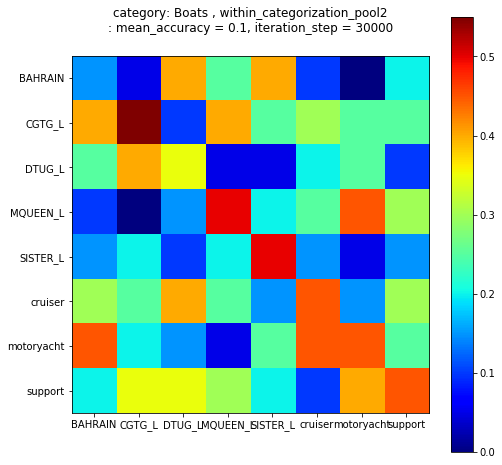

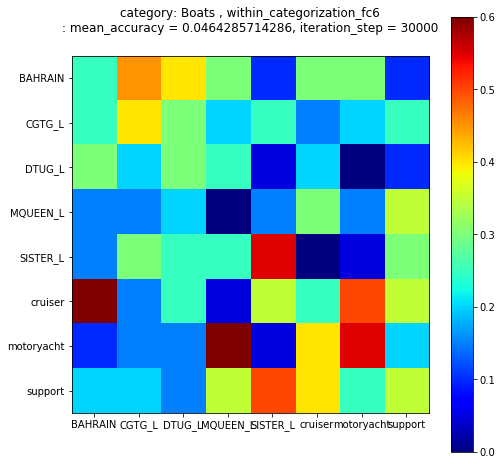

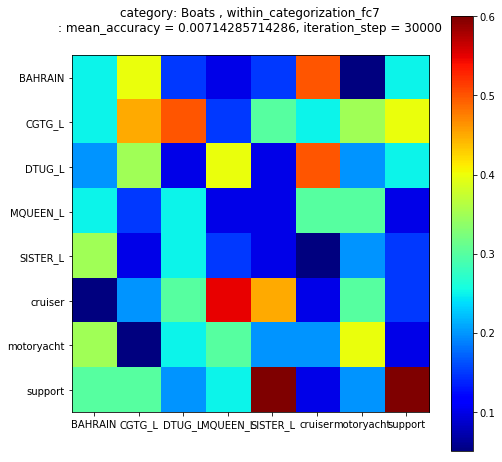

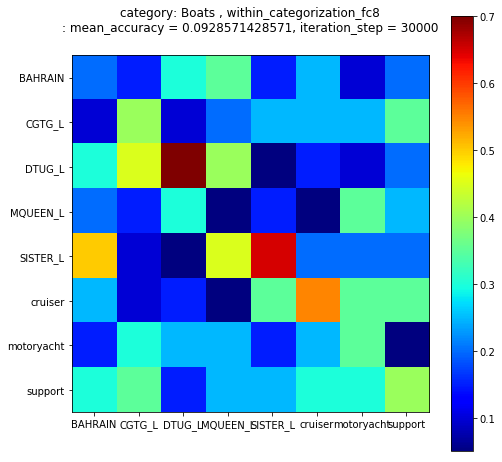

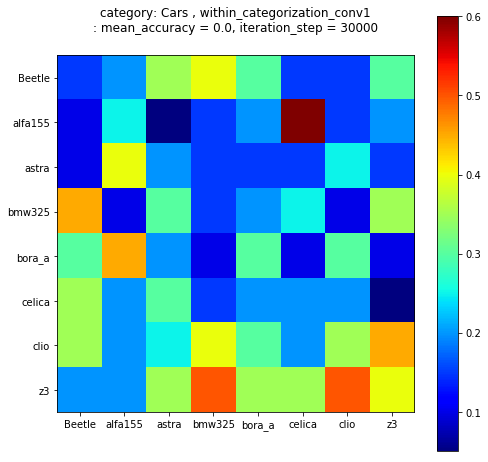

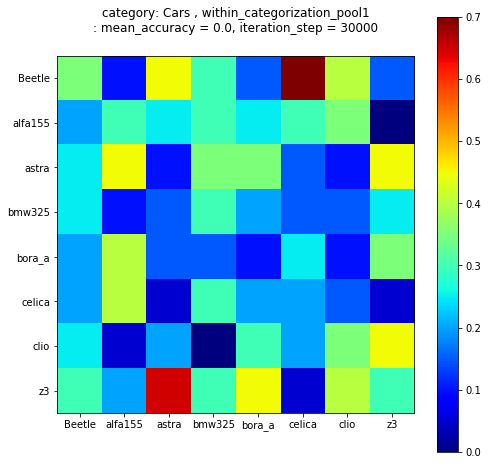

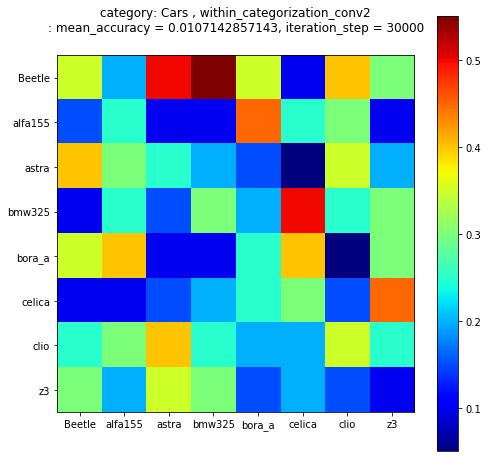

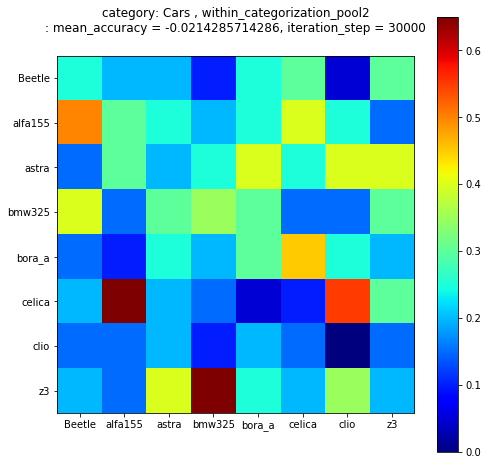

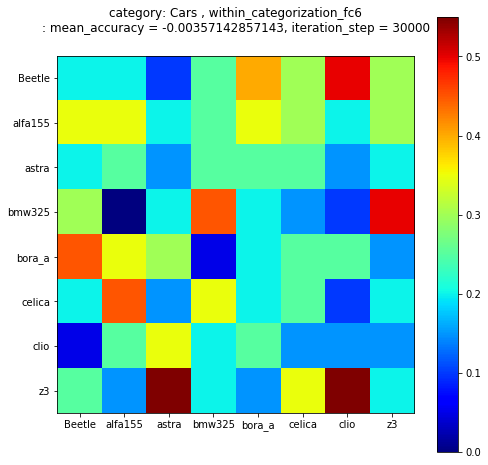

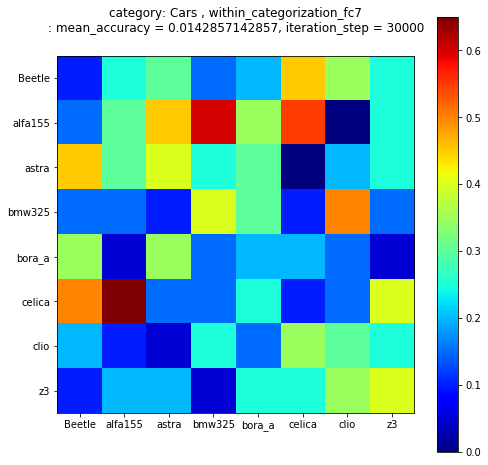

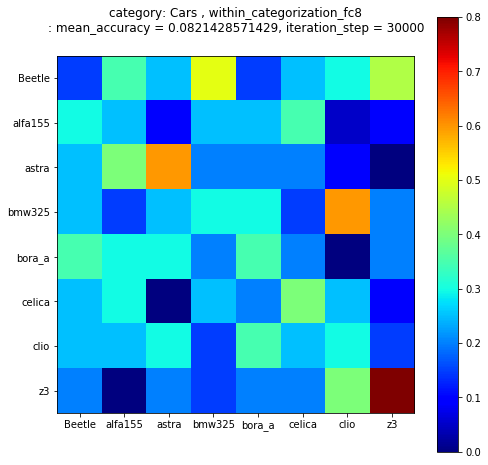

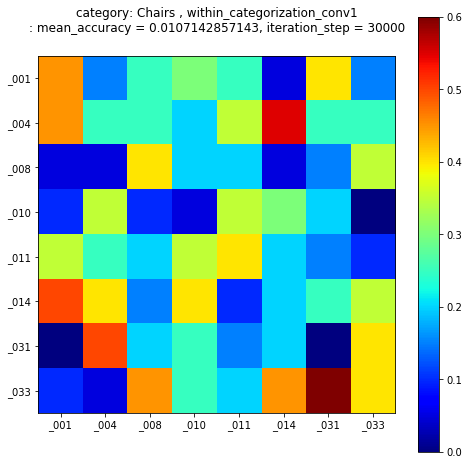

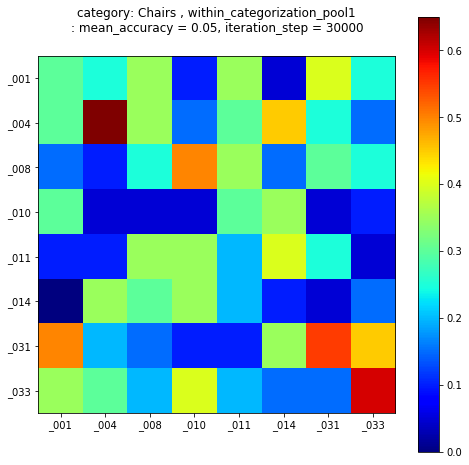

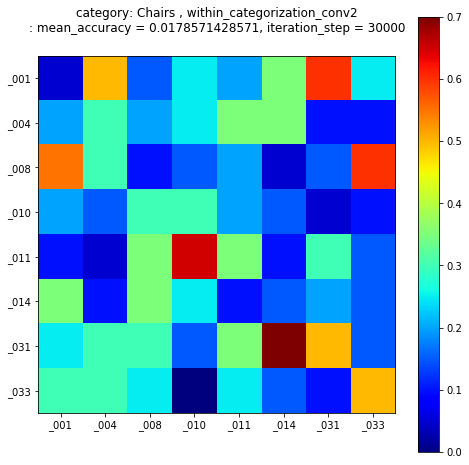

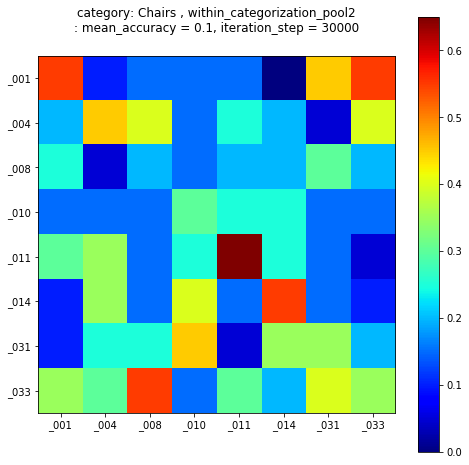

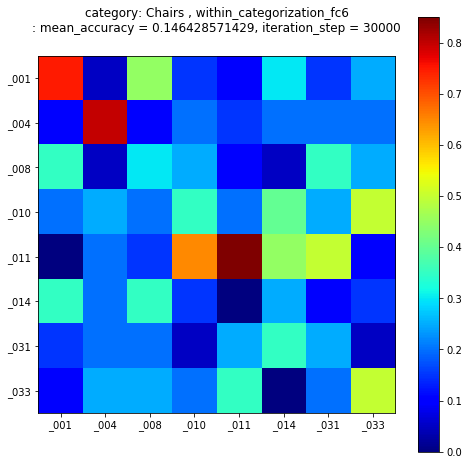

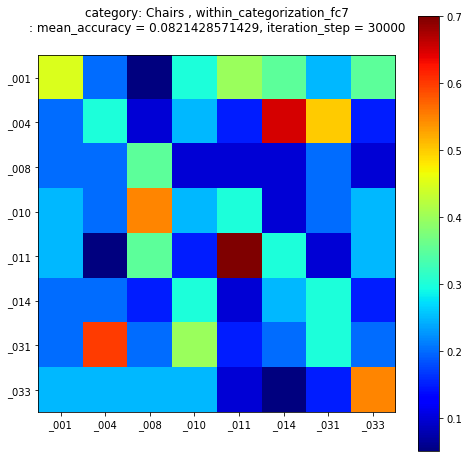

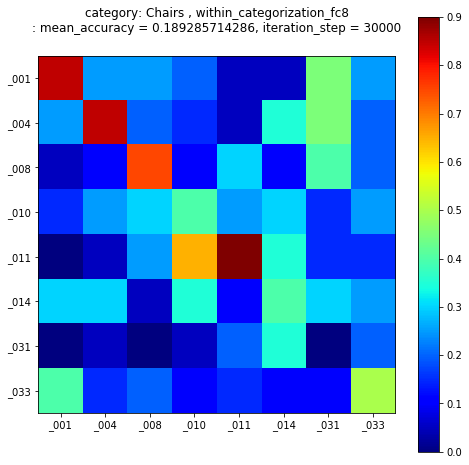

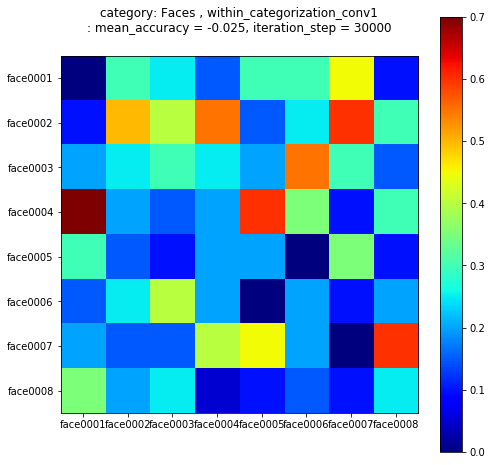

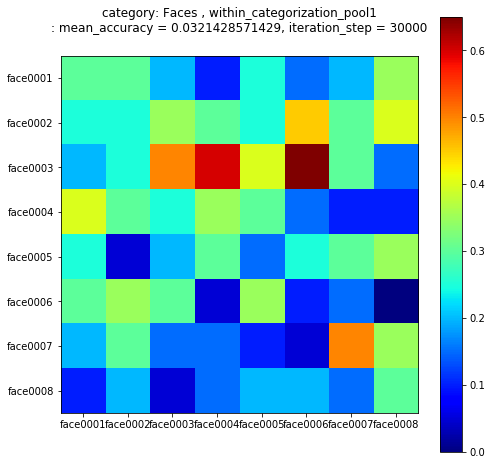

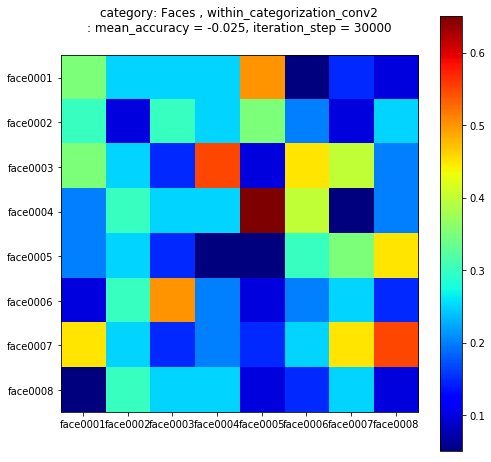

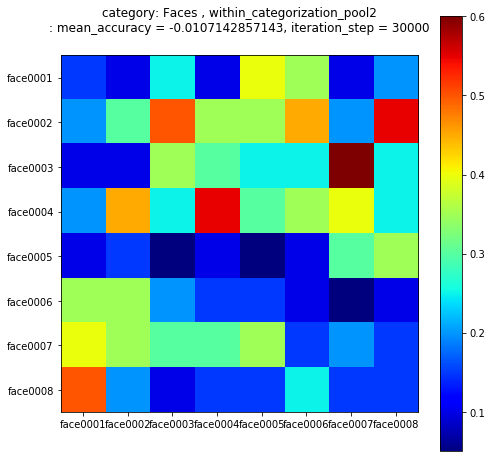

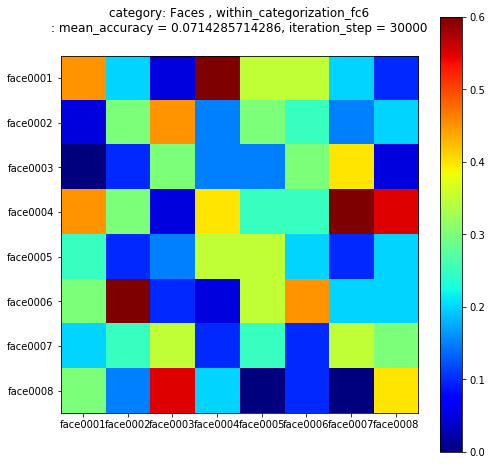

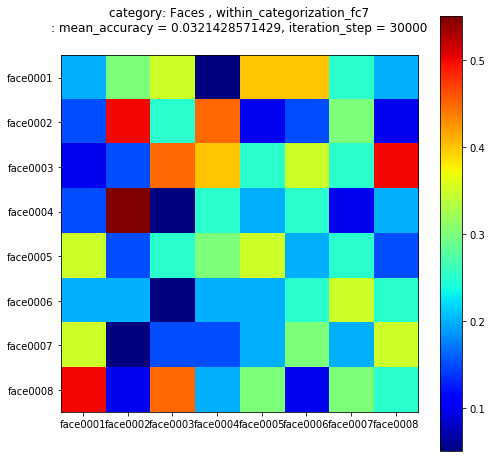

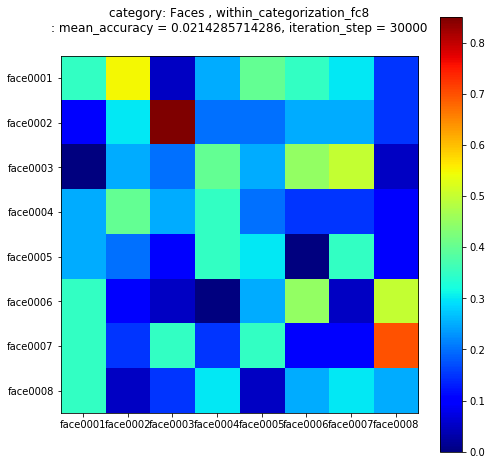

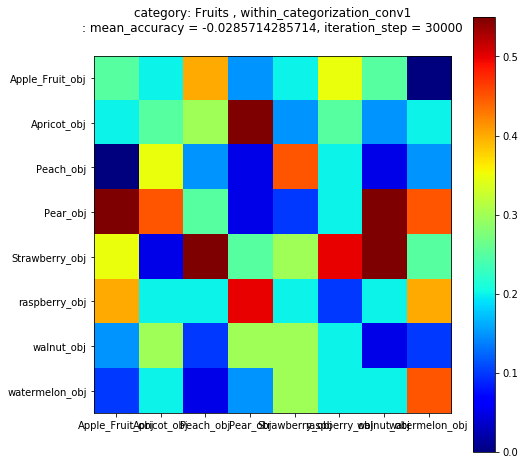

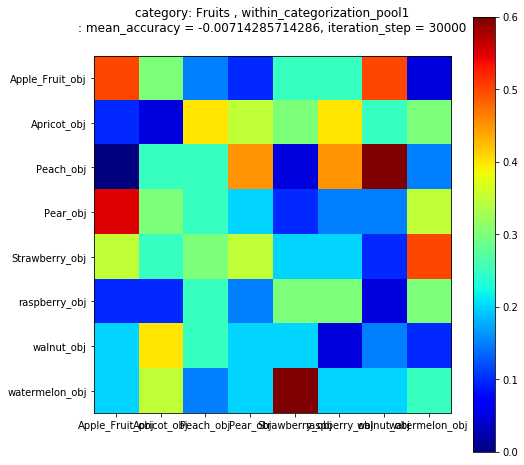

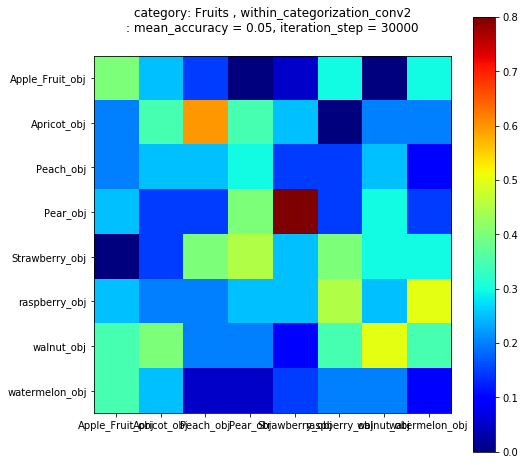

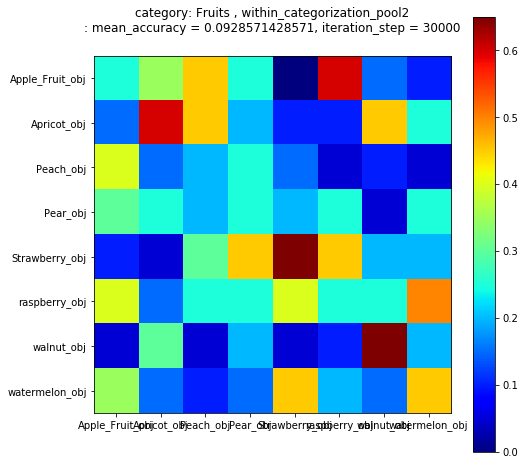

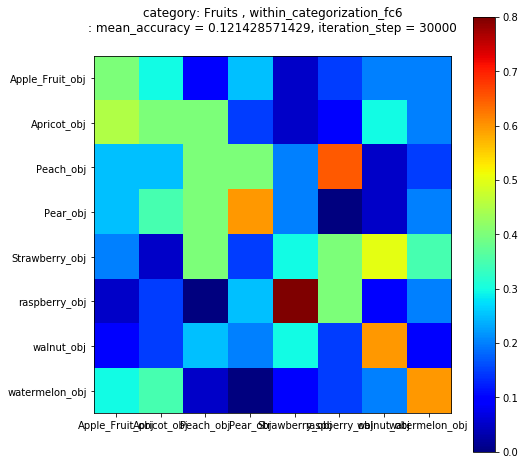

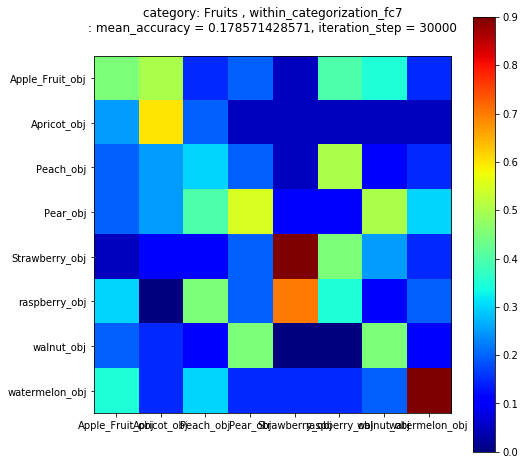

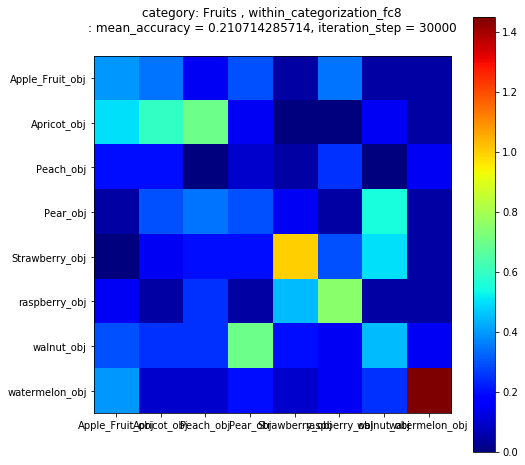

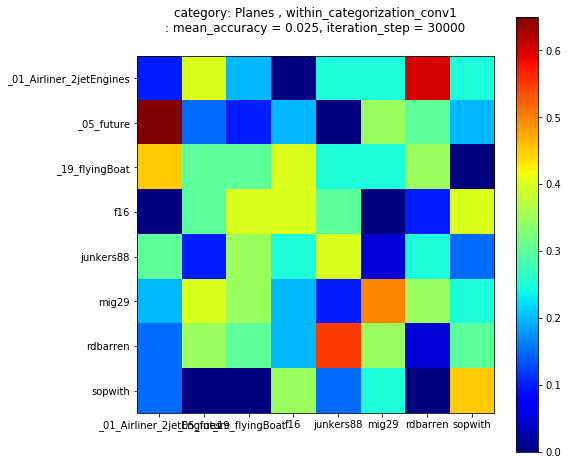

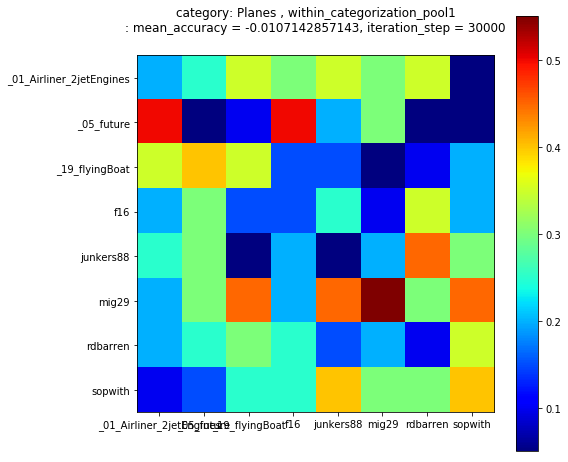

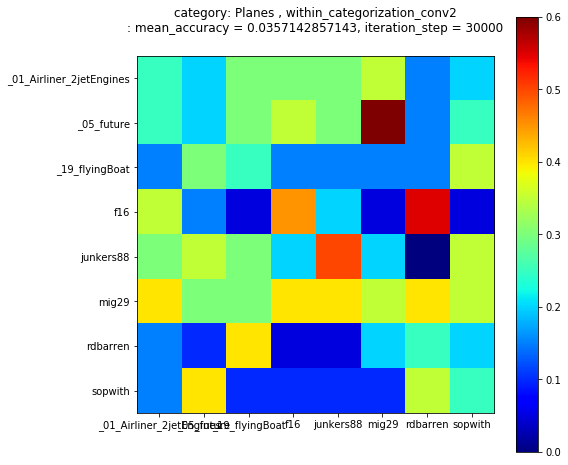

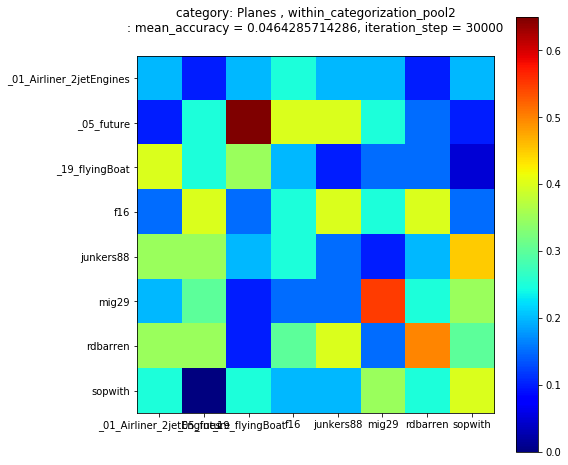

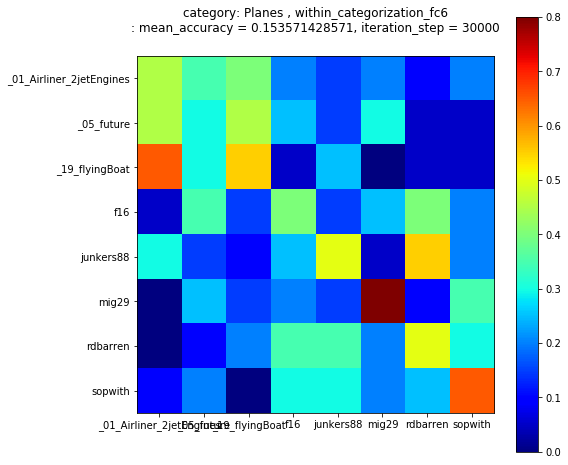

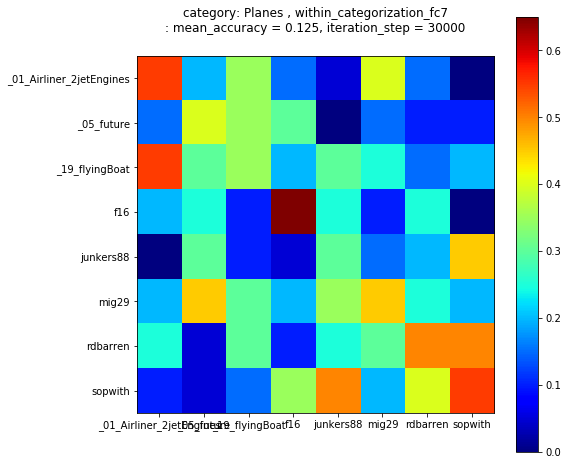

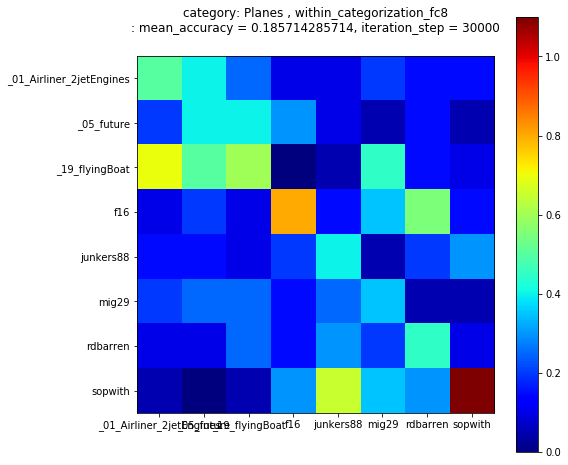

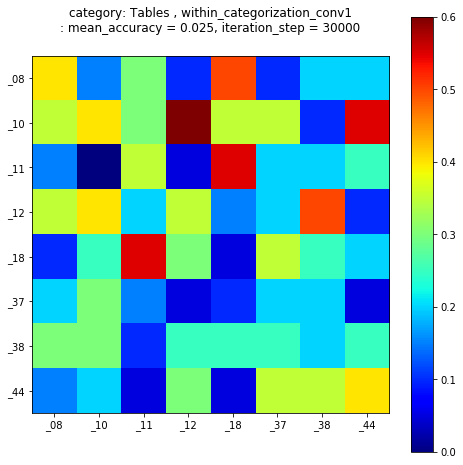

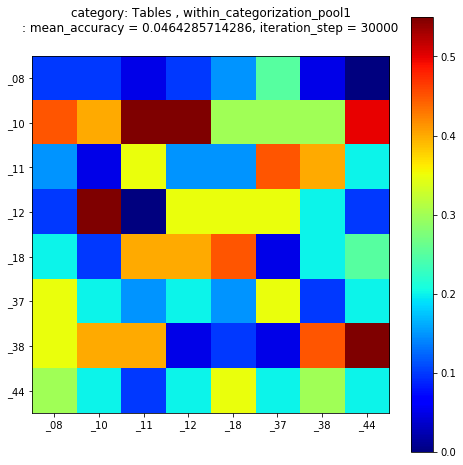

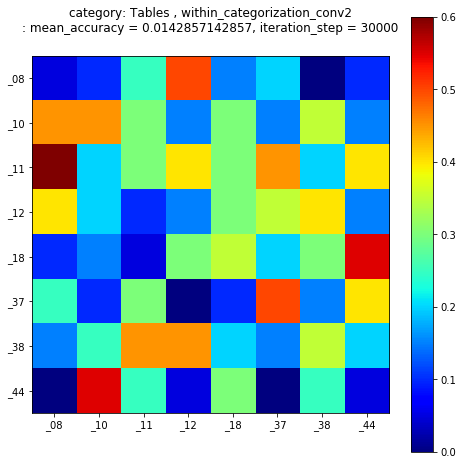

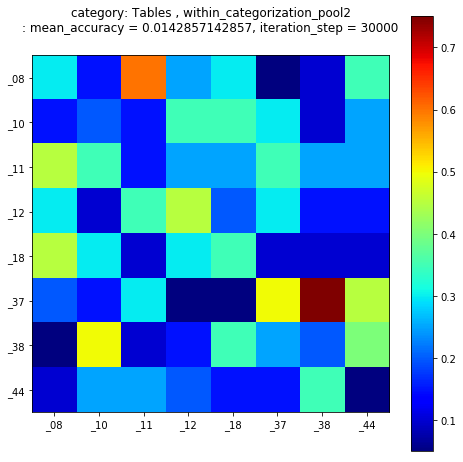

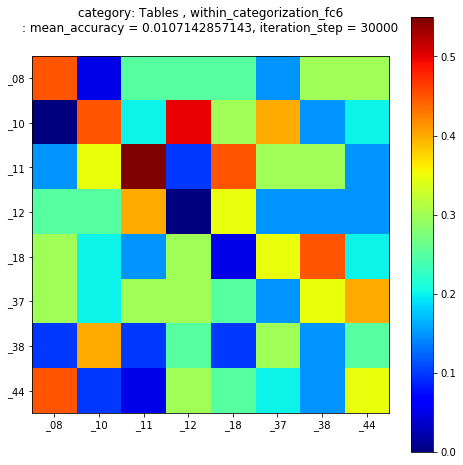

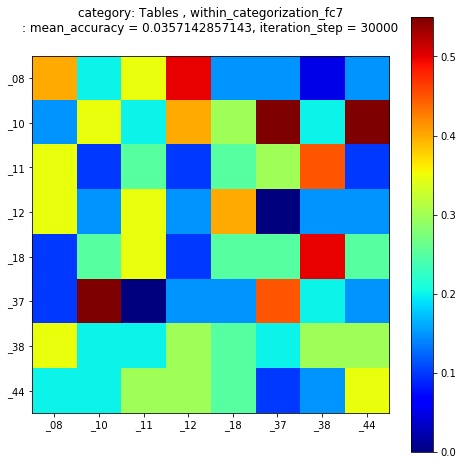

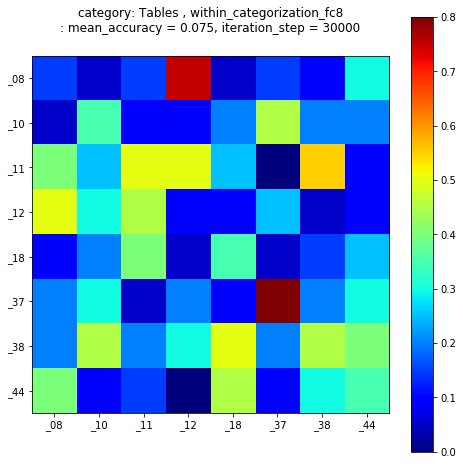

In [24]:
categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
for category in categories:
    for istep in step_list:
        plot_categorization_results(data[('V6',istep)], target_layers, istep, category=category)

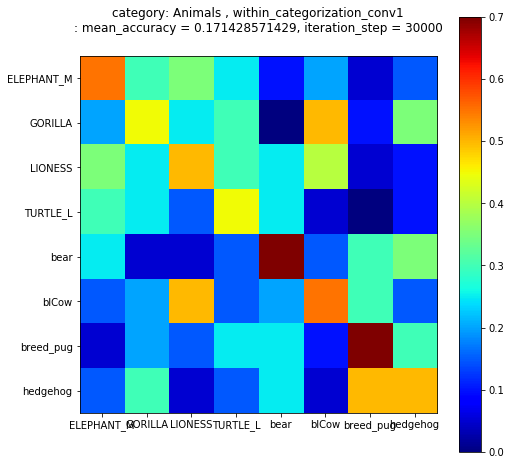

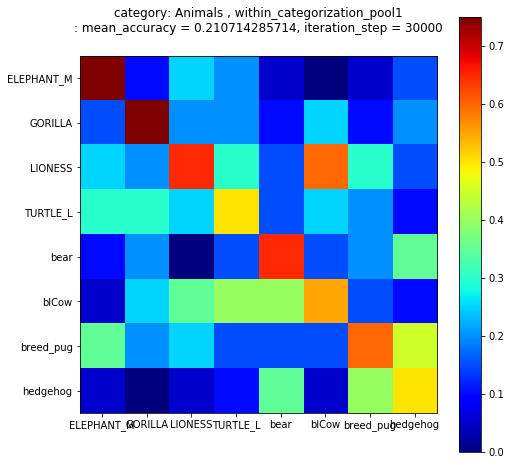

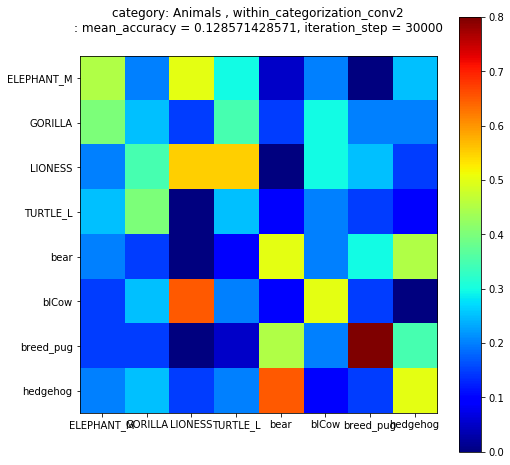

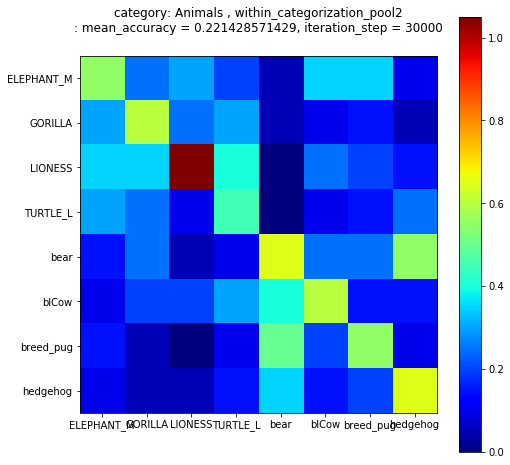

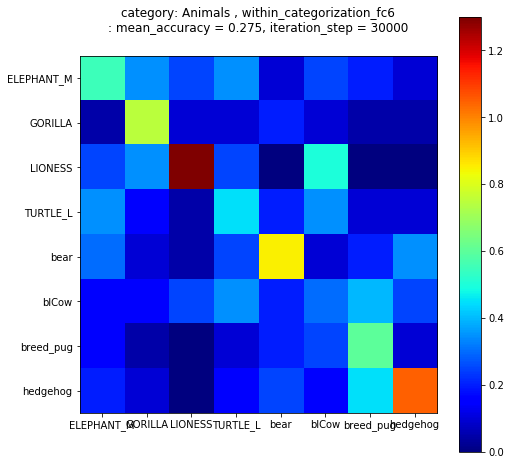

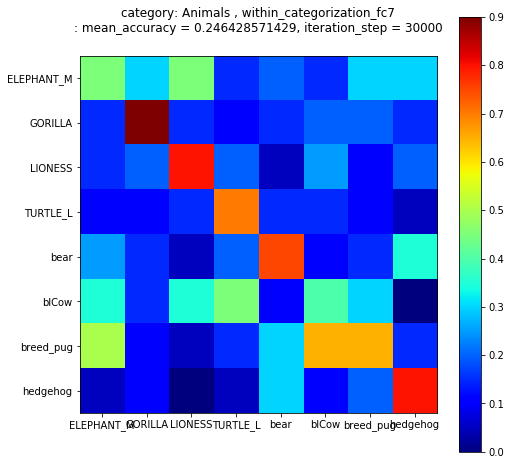

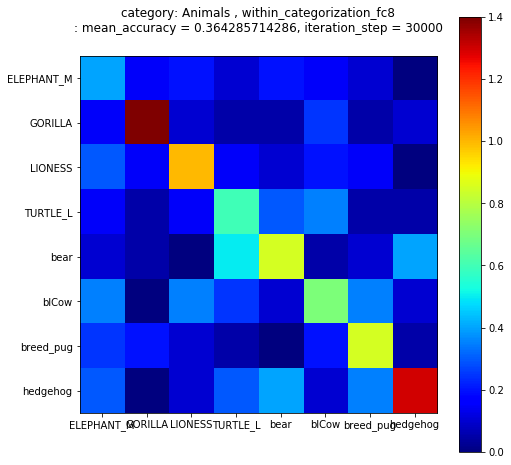

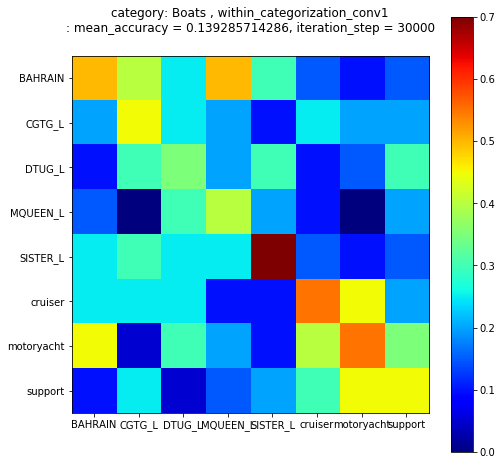

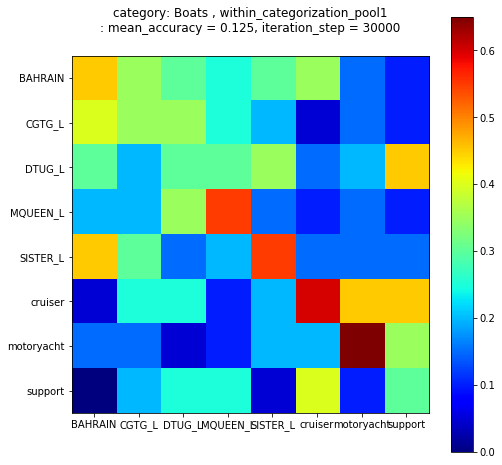

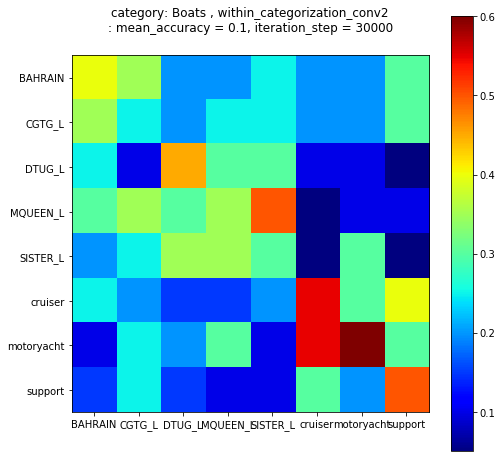

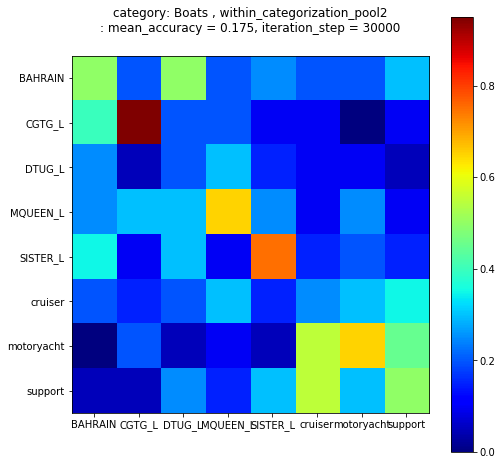

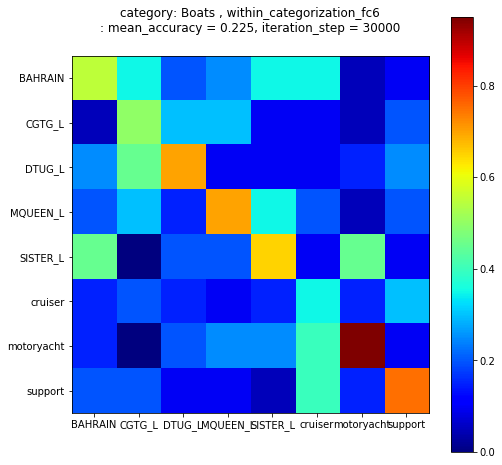

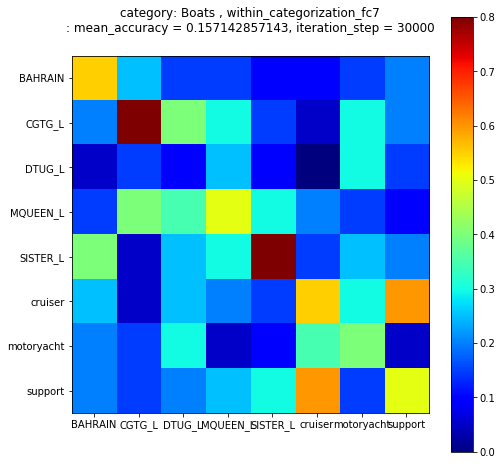

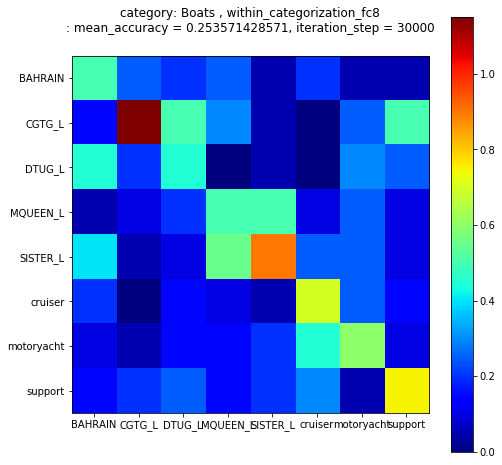

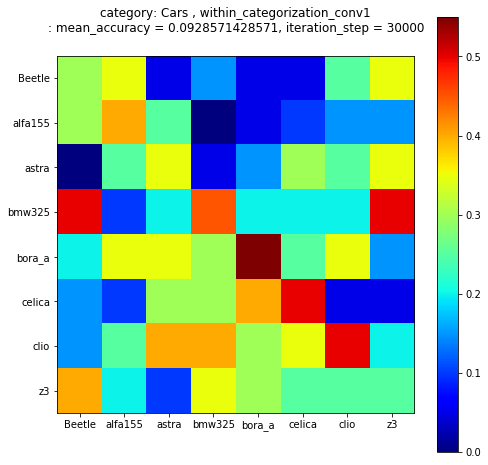

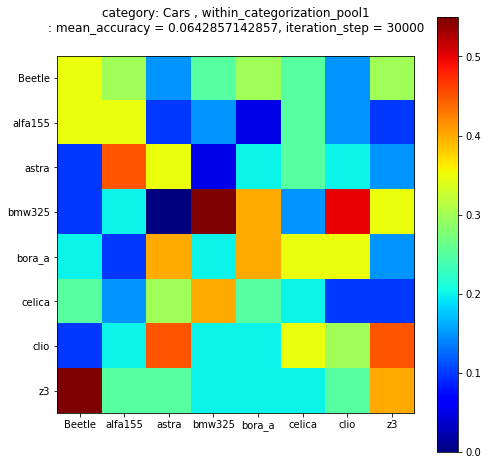

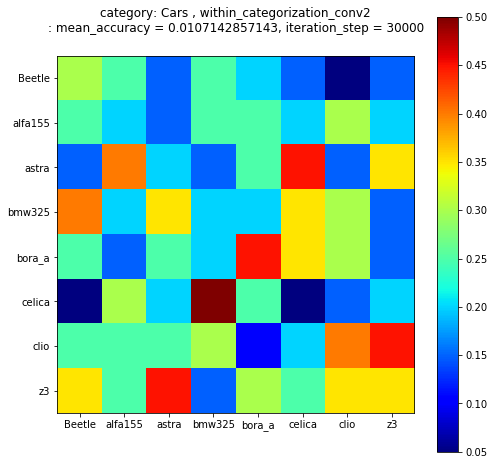

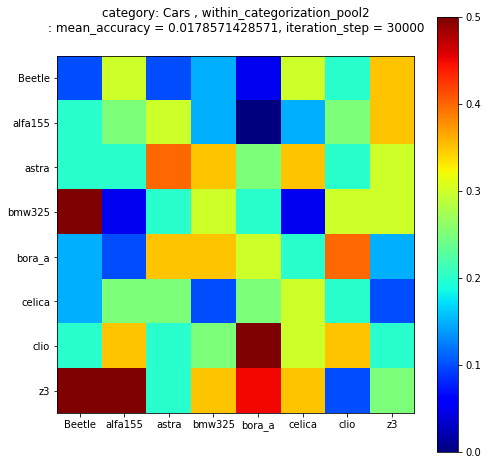

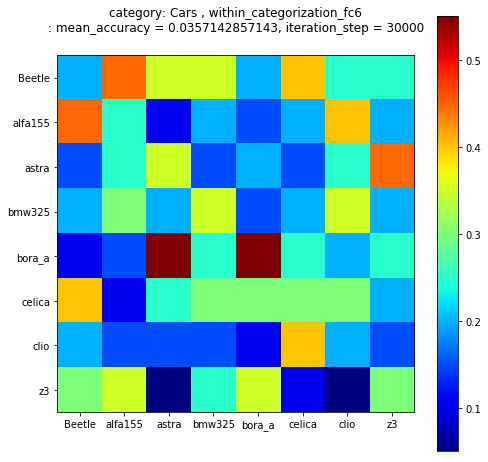

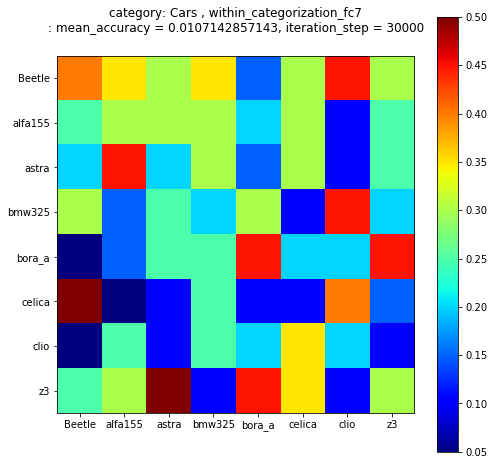

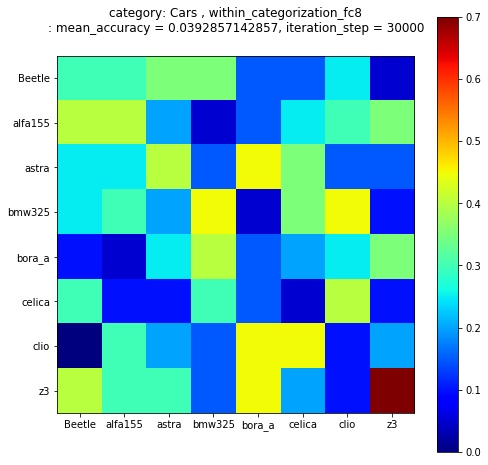

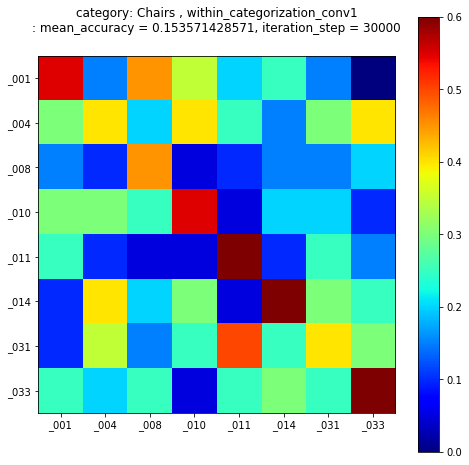

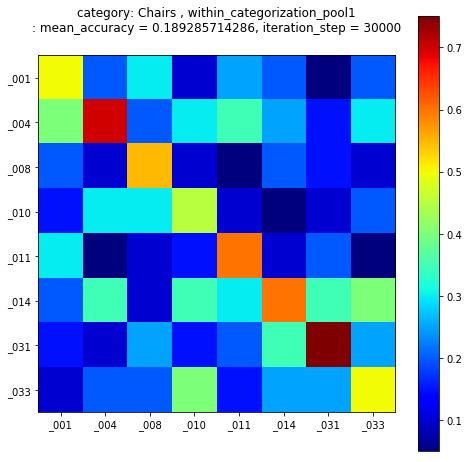

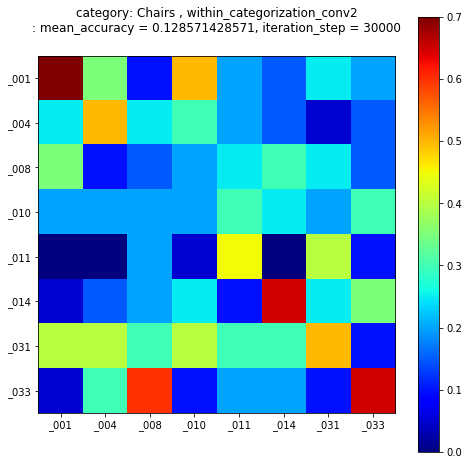

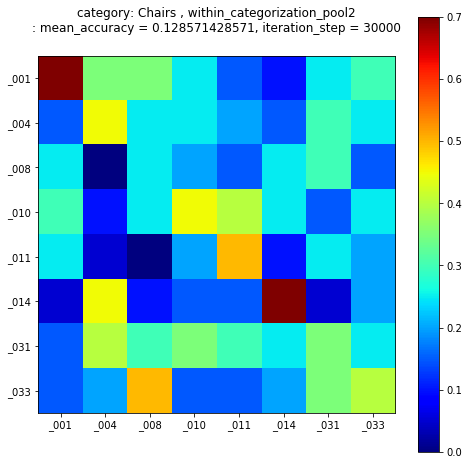

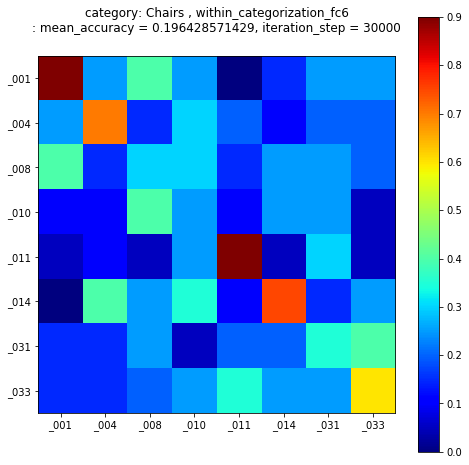

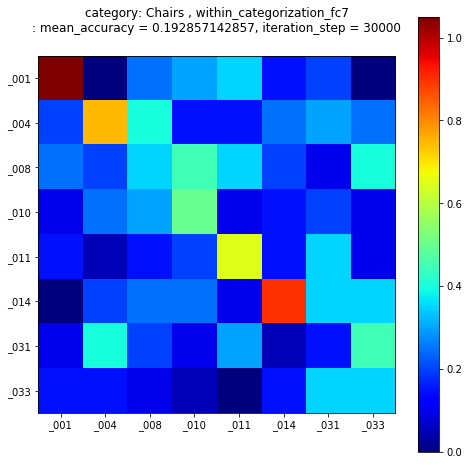

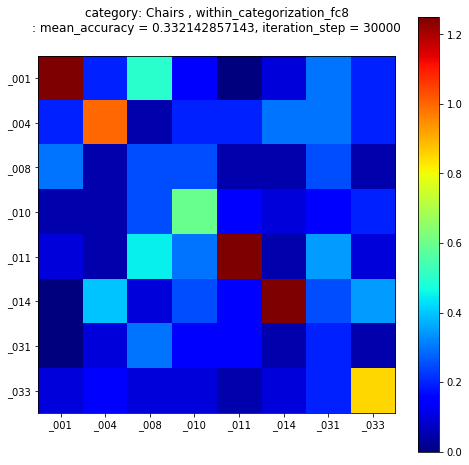

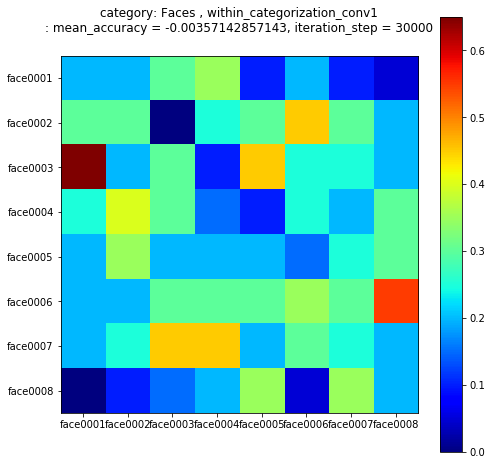

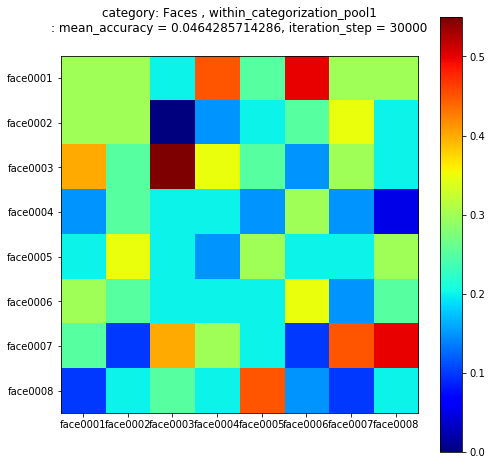

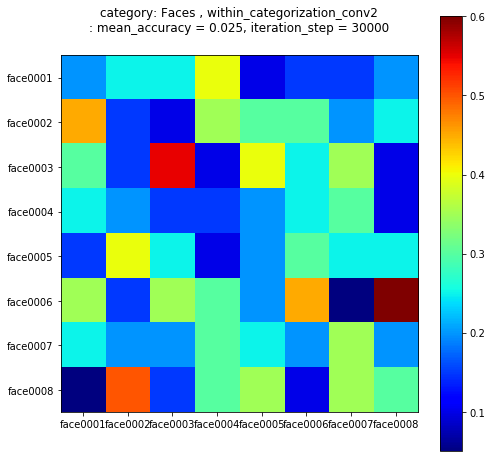

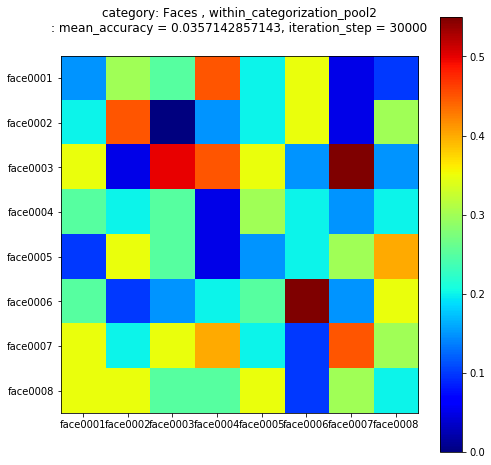

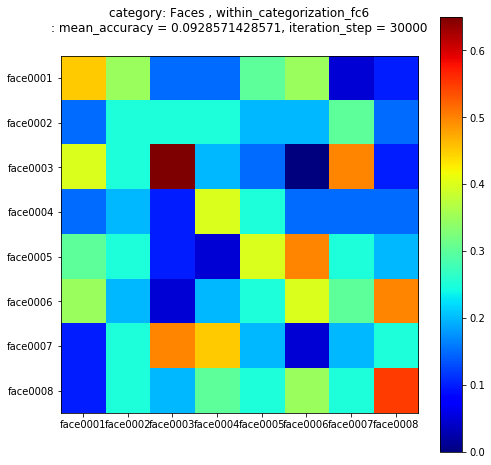

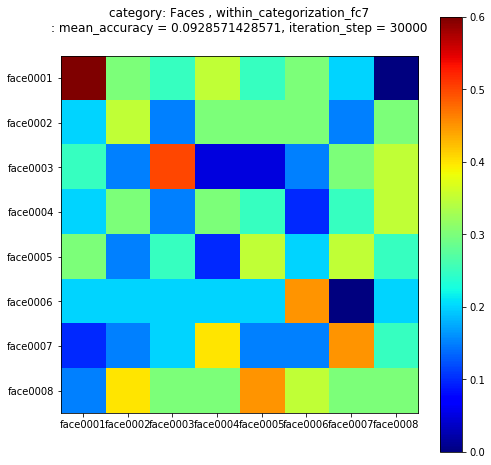

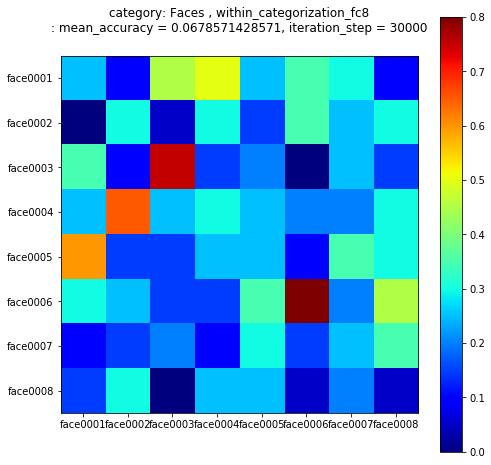

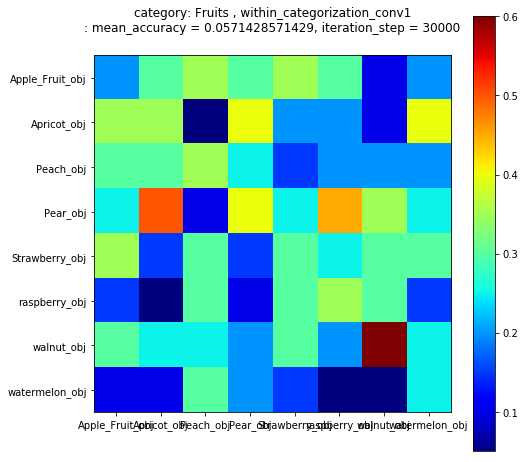

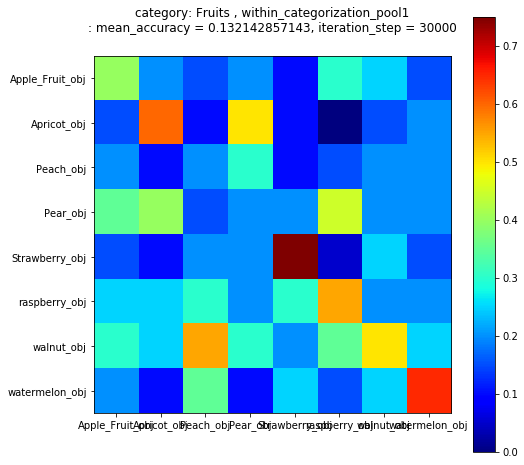

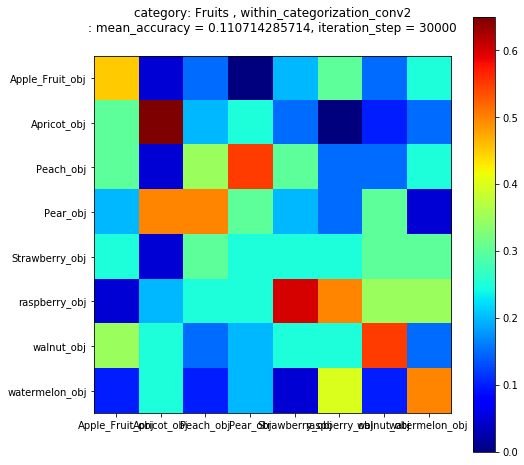

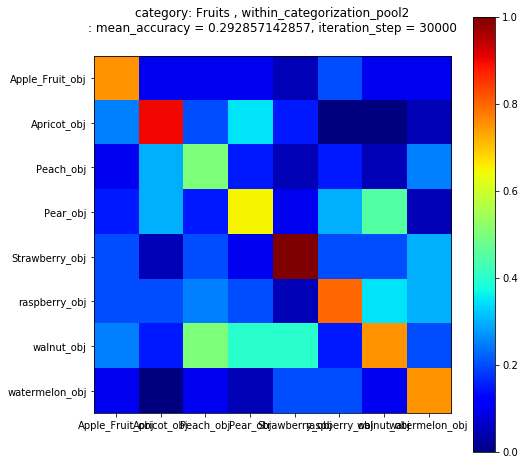

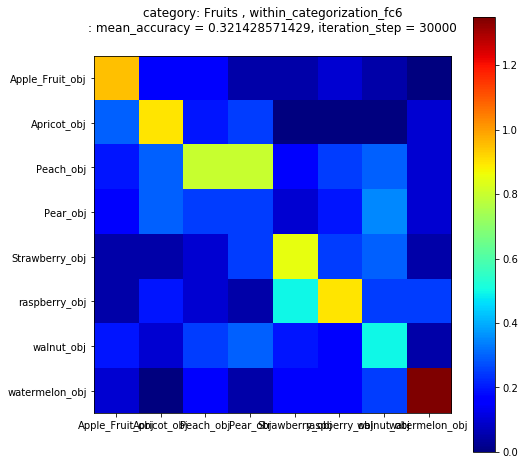

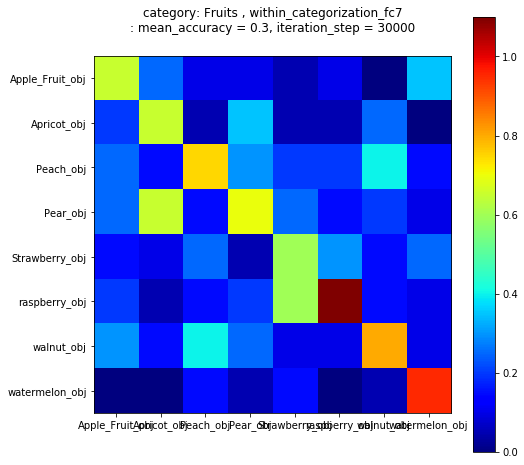

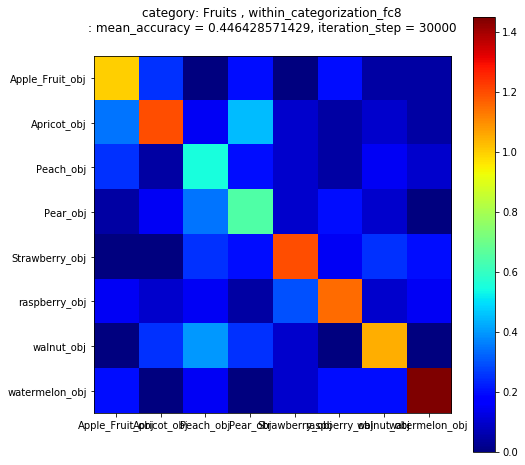

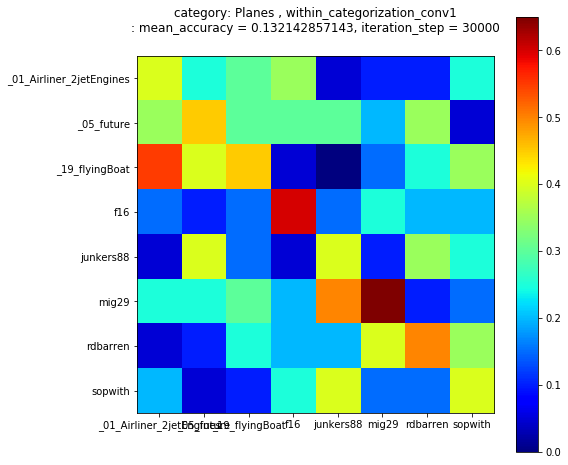

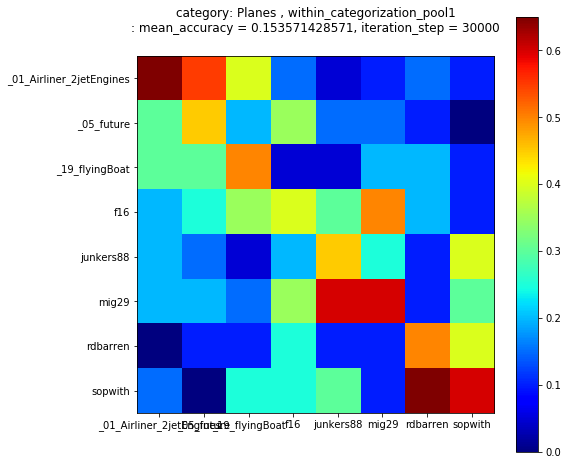

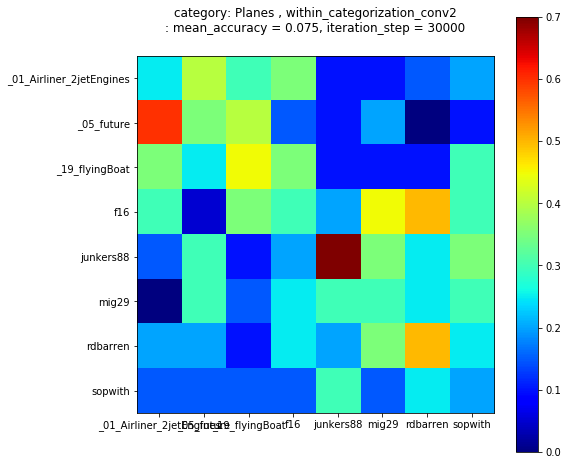

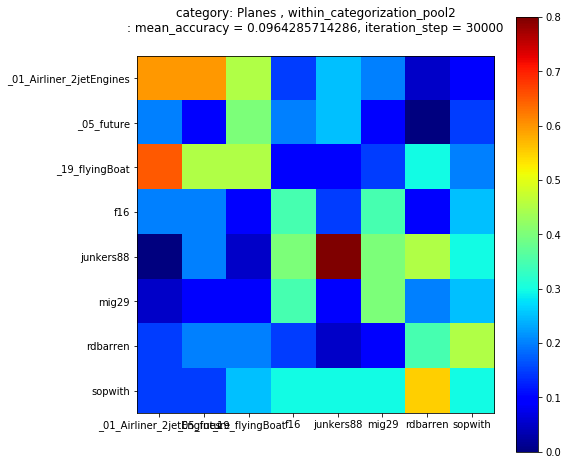

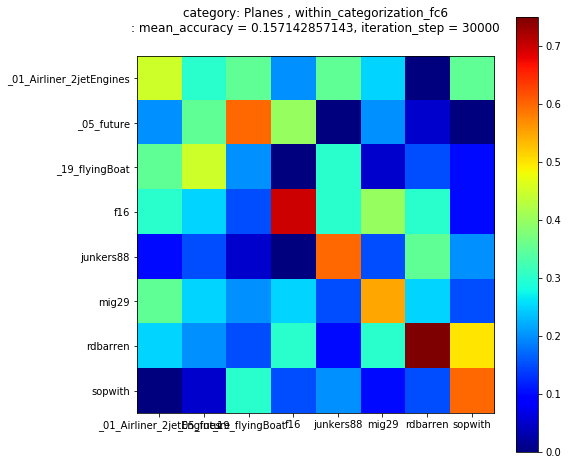

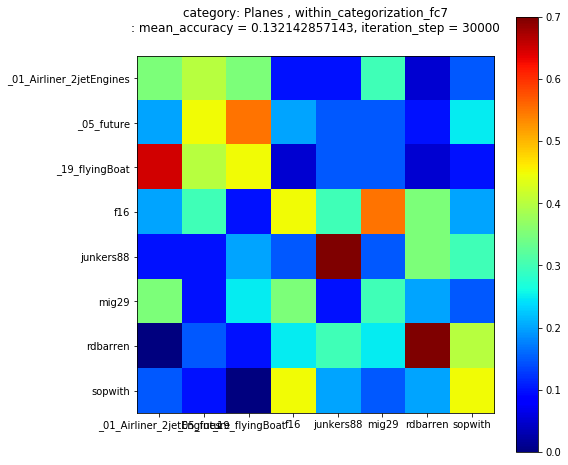

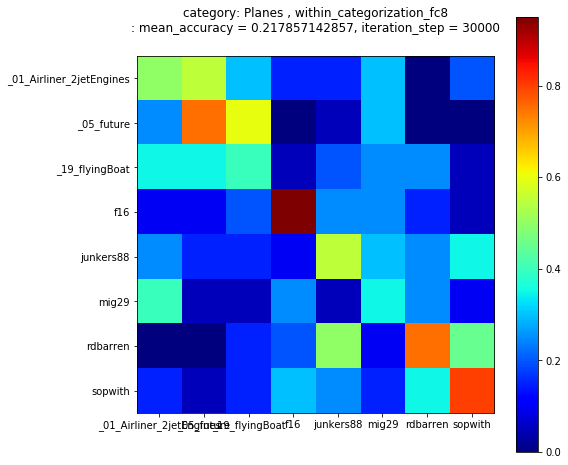

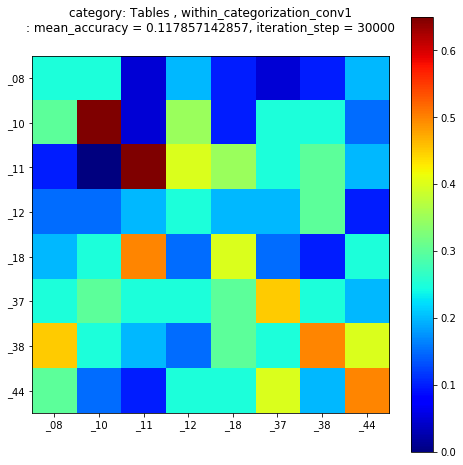

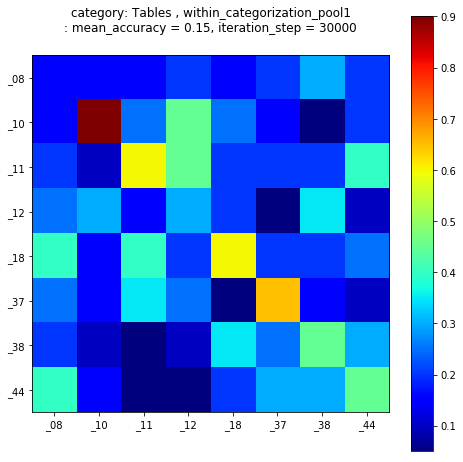

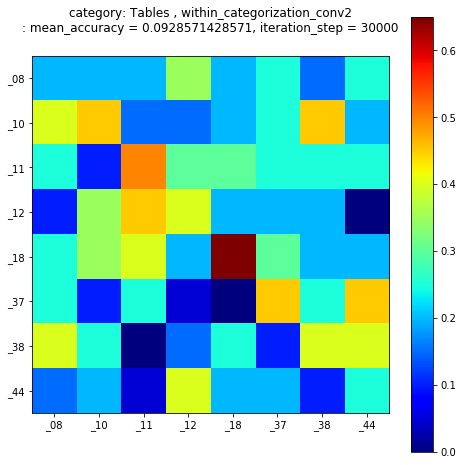

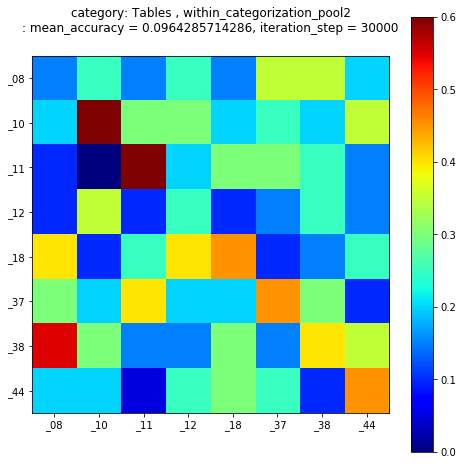

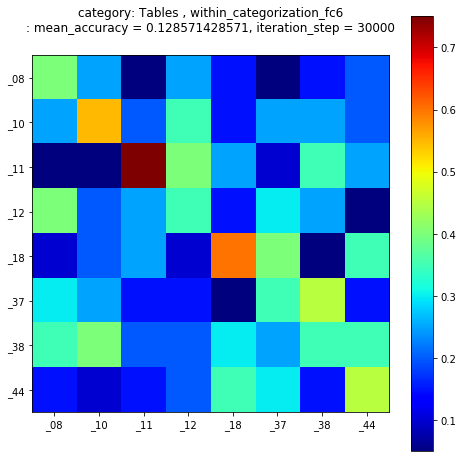

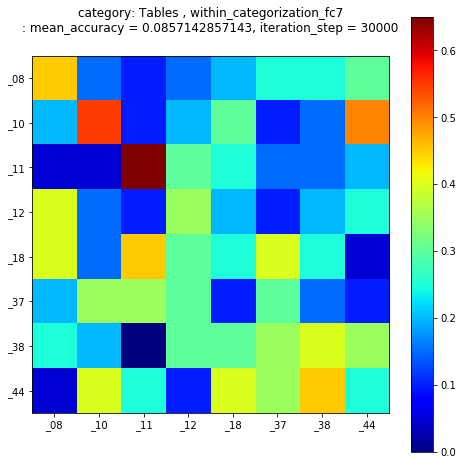

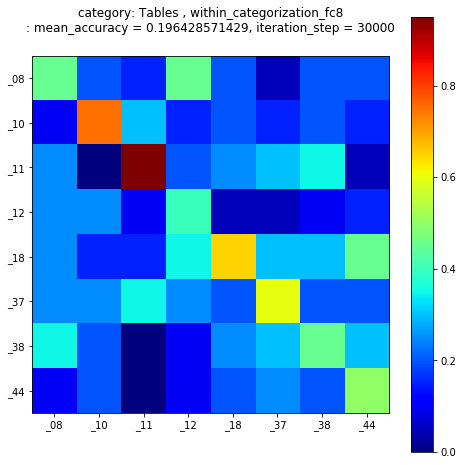

In [25]:
categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
for category in categories:
    for istep in step_list:
        plot_categorization_results(data[('V0V3V6',istep)], target_layers, istep, category=category)

### Continuous estimation results
We regress our activations against the 'ty' continuous variable. 

ty estimation is better with V6 only. 

In [36]:
print("Continuous Estimation Task for ty \n")
for istep in step_list:
    for layer in target_layers:
        print('step: '+str(istep) + ', ' + layer + ":")
        print(data[('V6',istep)]['continuous_' + layer]['rsquared_loss'])
        print("")

Continuous Estimation Task for ty 

step: 30000, conv1:
0.929409489504

step: 30000, pool1:
0.852466297823

step: 30000, conv2:
0.836159479944

step: 30000, pool2:
0.698941385246

step: 30000, fc6:
0.72787044717

step: 30000, fc7:
0.903161672984

step: 30000, fc8:
0.905348044645



In [37]:
print("Continuous Estimation Task for ty \n")
for istep in step_list:
    for layer in target_layers:
        print('step: '+str(istep) + ', ' + layer + ":")
        print(data[('V0V3V6',istep)]['continuous_' + layer]['rsquared_loss'])
        print("")

Continuous Estimation Task for ty 

step: 30000, conv1:
0.888717404365

step: 30000, pool1:
0.759476591584

step: 30000, conv2:
0.783520949465

step: 30000, pool2:
0.662867618853

step: 30000, fc6:
0.678119699247

step: 30000, fc7:
0.888797600056

step: 30000, fc8:
0.820854112175



### Analyzing the regression results

We will now display the results of the regression test. 

Please print (1 - data['it\_regression_"insert_target_layer_here"']['noise_corrected_multi_rsquared_loss']) for each layer and step and label the print out with the layer name and step. $r^2$ loss increases from conv to pool to fc, generally. 
Conv1 has the lowest $r^2$ loss of all layers. 


In [28]:
for istep in step_list:
    plot_regression_results(data[('V6',istep)], target_layers, istep)

Oh no...it_regression_conv1 did not regress
Oh no...it_regression_pool1 did not regress
Oh no...it_regression_conv2 did not regress
Oh no...it_regression_pool2 did not regress
Oh no...it_regression_fc6 did not regress
Oh no...it_regression_fc7 did not regress
Oh no...it_regression_fc8 did not regress


In [29]:
for istep in step_list:
    plot_regression_results(data[('V0V3V6',istep)], target_layers, istep)

step: 30000, layer: conv1, calculated_value: 0.0764744566033
step: 30000, layer: pool1, calculated_value: 0.129137954245
step: 30000, layer: conv2, calculated_value: 0.140136789032
step: 30000, layer: pool2, calculated_value: 0.244617237806
step: 30000, layer: fc6, calculated_value: 0.315049420765
step: 30000, layer: fc7, calculated_value: 0.311741905399
step: 30000, layer: fc8, calculated_value: 0.300949700504


### Visualizing the conv1 kernels
Lastly, we will plot the conv1 filter kernels. 

Your task is to visualize the 'conv1_kernel' in a 12 x 8 grid. Therefore, you just have to plot each kernel as an image in a subplot. The kernels are stored in data['conv1_kernel']. Print out the iteration step and plot the kernels. 

We see some psychedelic filters here. With on/off blobs and gabor-like filters, and some really funky shaped ones that are hard to describe. 

Iteration step: 30000


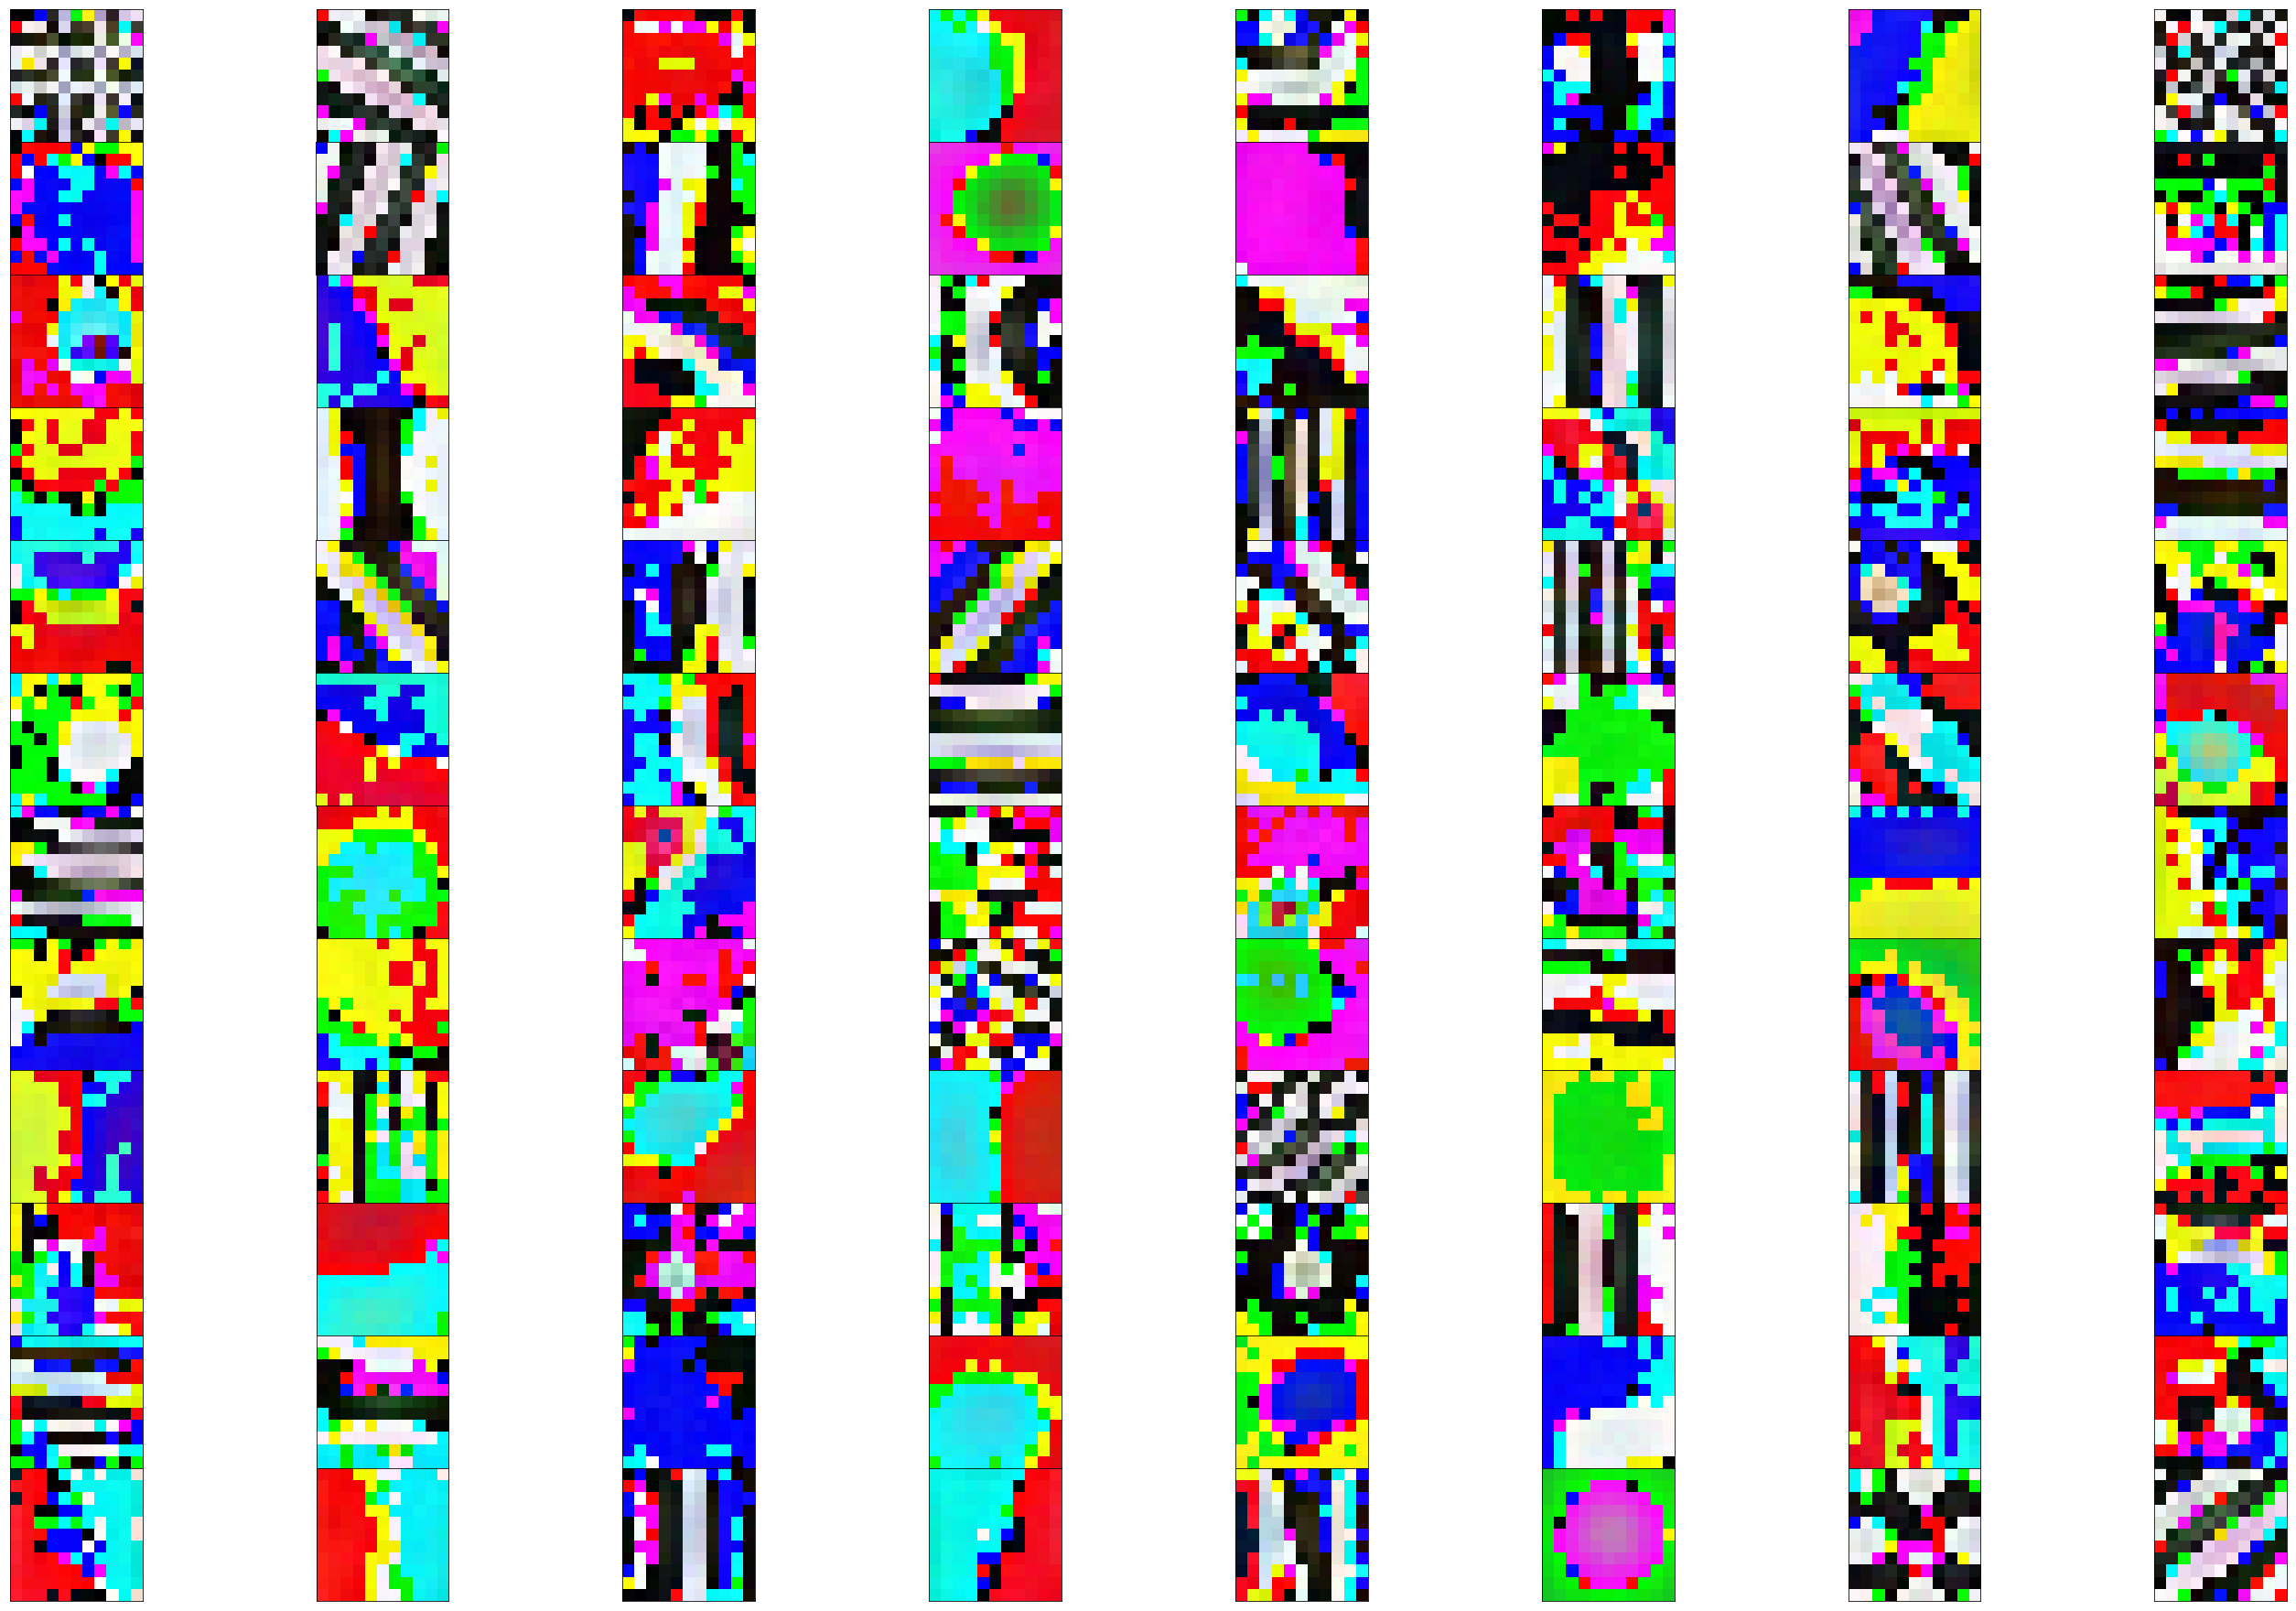

In [38]:
for istep in step_list:
    plot_conv1_kernels(data[('V0V3V6',istep)], istep)